In [19]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_sim_resp_24trp_500ns.tpr'
XTC = 'md_0_sim_resp_24trp_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

trp = u.select_atoms("resname TRP")

trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")




final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(trp_coms)-1):
        clust = [i]
        for j in range(i+1, len(trp_coms)):
            dist = np.linalg.norm(trp_coms[i] - trp_coms[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    # print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

df = pd.DataFrame(final_clusters)
average_clusters = df.mean(axis=0)

In [21]:
df = pd.DataFrame(final_clusters)
average_clusters = df.mean(axis=0)
print(average_clusters)

0     0.057310
1     1.774325
2     0.200713
3     0.020759
4     0.003439
5     0.000255
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [23]:
import pandas as pd

# Assuming final_clusters is already defined
df = pd.DataFrame(final_clusters)

# Calculate the total population
total_population = df.sum(axis=0)

# Calculate the population percentage
population_percentage = (total_population / total_population.sum()) * 100

# Print the result
print(population_percentage)


0      2.786378
1     86.266254
2      9.758514
3      1.009288
4      0.167183
5      0.012384
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
dtype: float64


In [24]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

# TPR = 'md_0_sim_resp_24trp-1sbt_500ns.tpr'
# XTC = 'md_0_sim_resp_24trp-1sbt_500ns_pbc_center.xtc'
TPR = 'md_0_sim_resp_24trp-1ta_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-1ta_500ns_pbc_center.xtc'

# TPR = 'md_0_sim_resp_24trp-1mnt_500ns.tpr'
# XTC = 'md_0_sim_resp_24trp-1mnt_500ns_pbc_center.xtc'
# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname TA5")

# Calculate the center of mass (COM) of TRP and TA molecules
trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")


final_clusters = []

for ts in u.trajectory[5000:]:

    clust_arr = np.zeros(24)
    # Calculate distances from TA to all TRPs and store them in dist1
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    dist1 = []
    for i in trp_coms:
        dist1.append(np.linalg.norm(i-ta_coms[0]))
    #print(dist1)
    
    # Identify TRPs outside cutoff
    cutoff_1 = 15.0
    outside_trps_idxs = np.where(np.array(dist1) >= cutoff_1)[0]
    #print(outside_trps_idxs)
    
    # Identify cluster between only those TRPs outside TA
    outside_trps_pos = trp_coms[outside_trps_idxs]
    #print(outside_trps_pos)
    cutoff_2 = 7.5
    all_clust = []
    for i in range(0, len(outside_trps_idxs)-1):
        clust = [i]
        for j in range(i+1, len(outside_trps_idxs)):
            dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
            if dist <= cutoff_2:
                clust.append(j)
        if (len(clust) > 1):
            all_clust.append(clust)
    # print(all_clust)
    
    if (len(all_clust) > 1):
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
        
    else:
        size = len(all_clust)
        if size == 0:
            clust_arr[0] += 1
            final_clusters.append(clust_arr)
        else:
            id = len(all_clust[0]) - 1
            clust_arr[id] += 1
            final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

In [25]:
df1 = pd.DataFrame(final_clusters)
average_clusters_1ta = df1.mean(axis=0)
print(average_clusters_1ta)

0     0.236226
1     1.061837
2     0.112216
3     0.018366
4     0.004212
5     0.000505
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [ ]:
import pandas as pd
# Calculate the total population

total_population = df1.sum(axis=0)

# Calculate the population percentage
population_percentage_ta = (total_population / total_population.sum()) * 100

# Print the result
print(population_percentage_ta)


0     16.480545
1     74.080169
2      7.828847
3      1.281298
4      0.293876
5      0.035265
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
dtype: float64


In [32]:
df1 = pd.DataFrame(final_clusters)
average_clusters_1sbt = df1.mean(axis=0)
print(average_clusters_1sbt)

0     0.049386
1     1.862762
2     0.213426
3     0.029160
4     0.008934
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [35]:
df1 = pd.DataFrame(final_clusters)
average_clusters_1mnt = df1.mean(axis=0)
print(average_clusters_1mnt)

0     0.054224
1     1.819254
2     0.176003
3     0.017049
4     0.001795
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [32]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rdf
from itertools import combinations
from functools import reduce
import pandas as pd

import warnings
warnings.simplefilter("ignore", category=np.VisibleDeprecationWarning)

TPR = 'md_0_sim_resp_24trp-6sbt_500ns.tpr'
XTC = 'md_0_sim_resp_24trp-6sbt_500ns_pbc_center.xtc'

# Load the trajectory and topology
u = mda.Universe(TPR, XTC)

# Select TRP and TA atoms
trp = u.select_atoms("resname TRP")
ta = u.select_atoms("resname SBT")

final_clusters = []

for ts in u.trajectory[5000:]:
    clust_arr = np.zeros(24)
    
    # Recalculate COMs for each frame
    trp_coms = trp.center_of_mass(unwrap=True, compound="fragments")
    ta_coms = ta.center_of_mass(unwrap=True, compound="fragments")
    
    # Find TRPs near TA molecules
    cutoff_1 = 12.0
    inside_trps_idxs = []
    for ta_com in ta_coms:
        distances = [np.linalg.norm(trp_com - ta_com) for trp_com in trp_coms]
        inside_trps_idxs.append(np.where(np.array(distances) <= cutoff_1)[0])
    
    # Combine and deduplicate indices
    inside_trps_idxs = np.unique(np.concatenate(inside_trps_idxs))
    
    # Find TRPs NOT near any TA molecules
    outside_trp_idxs = np.setdiff1d(np.arange(len(trp_coms)), inside_trps_idxs)
    
    # Get positions of outside TRPs
    outside_trps_pos = trp_coms[outside_trp_idxs]
    
    # Cluster analysis for outside TRPs
    cutoff_2 = 7.5
    all_clust = []
    
    # Check if there are enough TRPs to cluster
    if len(outside_trp_idxs) > 1:
        # Compare all pairs of outside TRPs
        for i in range(len(outside_trp_idxs)-1):
            clust = [i]
            for j in range(i+1, len(outside_trp_idxs)):
                dist = np.linalg.norm(outside_trps_pos[i] - outside_trps_pos[j])
                if dist <= cutoff_2:
                    clust.append(j)
            if len(clust) > 1:
                all_clust.append(clust)
                
    # Cluster merging logic
    if len(all_clust) > 1:
        i = 0
        j = 0
        while i < len(all_clust) - 1:        
            intersect_clust = all_clust[i]
            while len(intersect_clust) != 0 and i < (len(all_clust) - 1):
                i += 1 
                intersect_clust = np.intersect1d(intersect_clust, all_clust[i]) 
            all_list = [m for m in all_clust[j:i]]  
            union_clust = reduce(np.union1d, all_list) 
            clust_arr[len(union_clust) - 1] += 1
            final_clusters.append(clust_arr)
            j = i
    else:
        if len(all_clust) == 0:
            clust_arr[0] += 1
        else:
            cluster_size = len(all_clust[0])
            clust_arr[cluster_size - 1] += 1
        final_clusters.append(clust_arr)

final_clusters = np.array(final_clusters)

In [38]:
df1 = pd.DataFrame(final_clusters)
average_clusters_2sbt = df1.mean(axis=0)
print(average_clusters_2sbt)

0     0.061393
1     1.770195
2     0.190772
3     0.026625
4     0.004653
5     0.001034
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [43]:
df1 = pd.DataFrame(final_clusters)
average_clusters_2mnt = df1.mean(axis=0)
print(average_clusters_2mnt)

0     0.060730
1     1.773922
2     0.213702
3     0.020924
4     0.000638
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [49]:
df1 = pd.DataFrame(final_clusters)
average_clusters_4mnt = df1.mean(axis=0)
print(average_clusters_4mnt)

0     0.094409
1     1.568559
2     0.171958
3     0.016156
4     0.008148
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [30]:
df1 = pd.DataFrame(final_clusters)
average_clusters_6mnt = df1.mean(axis=0)
print(average_clusters_6mnt)

0     0.111384
1     1.474140
2     0.171193
3     0.020659
4     0.001300
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [52]:
df1 = pd.DataFrame(final_clusters)
average_clusters_4sbt = df1.mean(axis=0)
print(average_clusters_4sbt)

0     0.075352
1     1.649215
2     0.193317
3     0.015963
4     0.002029
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [33]:
df1 = pd.DataFrame(final_clusters)
average_clusters_6sbt = df1.mean(axis=0)
print(average_clusters_6sbt)

0     0.098590
1     1.560649
2     0.156841
3     0.022003
4     0.002821
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [56]:
df1 = pd.DataFrame(final_clusters)
average_clusters_2ta = df1.mean(axis=0)
print(average_clusters_2ta)

0     0.307343
1     0.868481
2     0.098552
3     0.032269
4     0.013605
5     0.012036
6     0.001221
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


In [61]:
df1 = pd.DataFrame(final_clusters)
average_clusters_3ta = df1.mean(axis=0)
print(average_clusters_3ta)

0     0.472227
1     0.674977
2     0.074060
3     0.006049
4     0.000367
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64


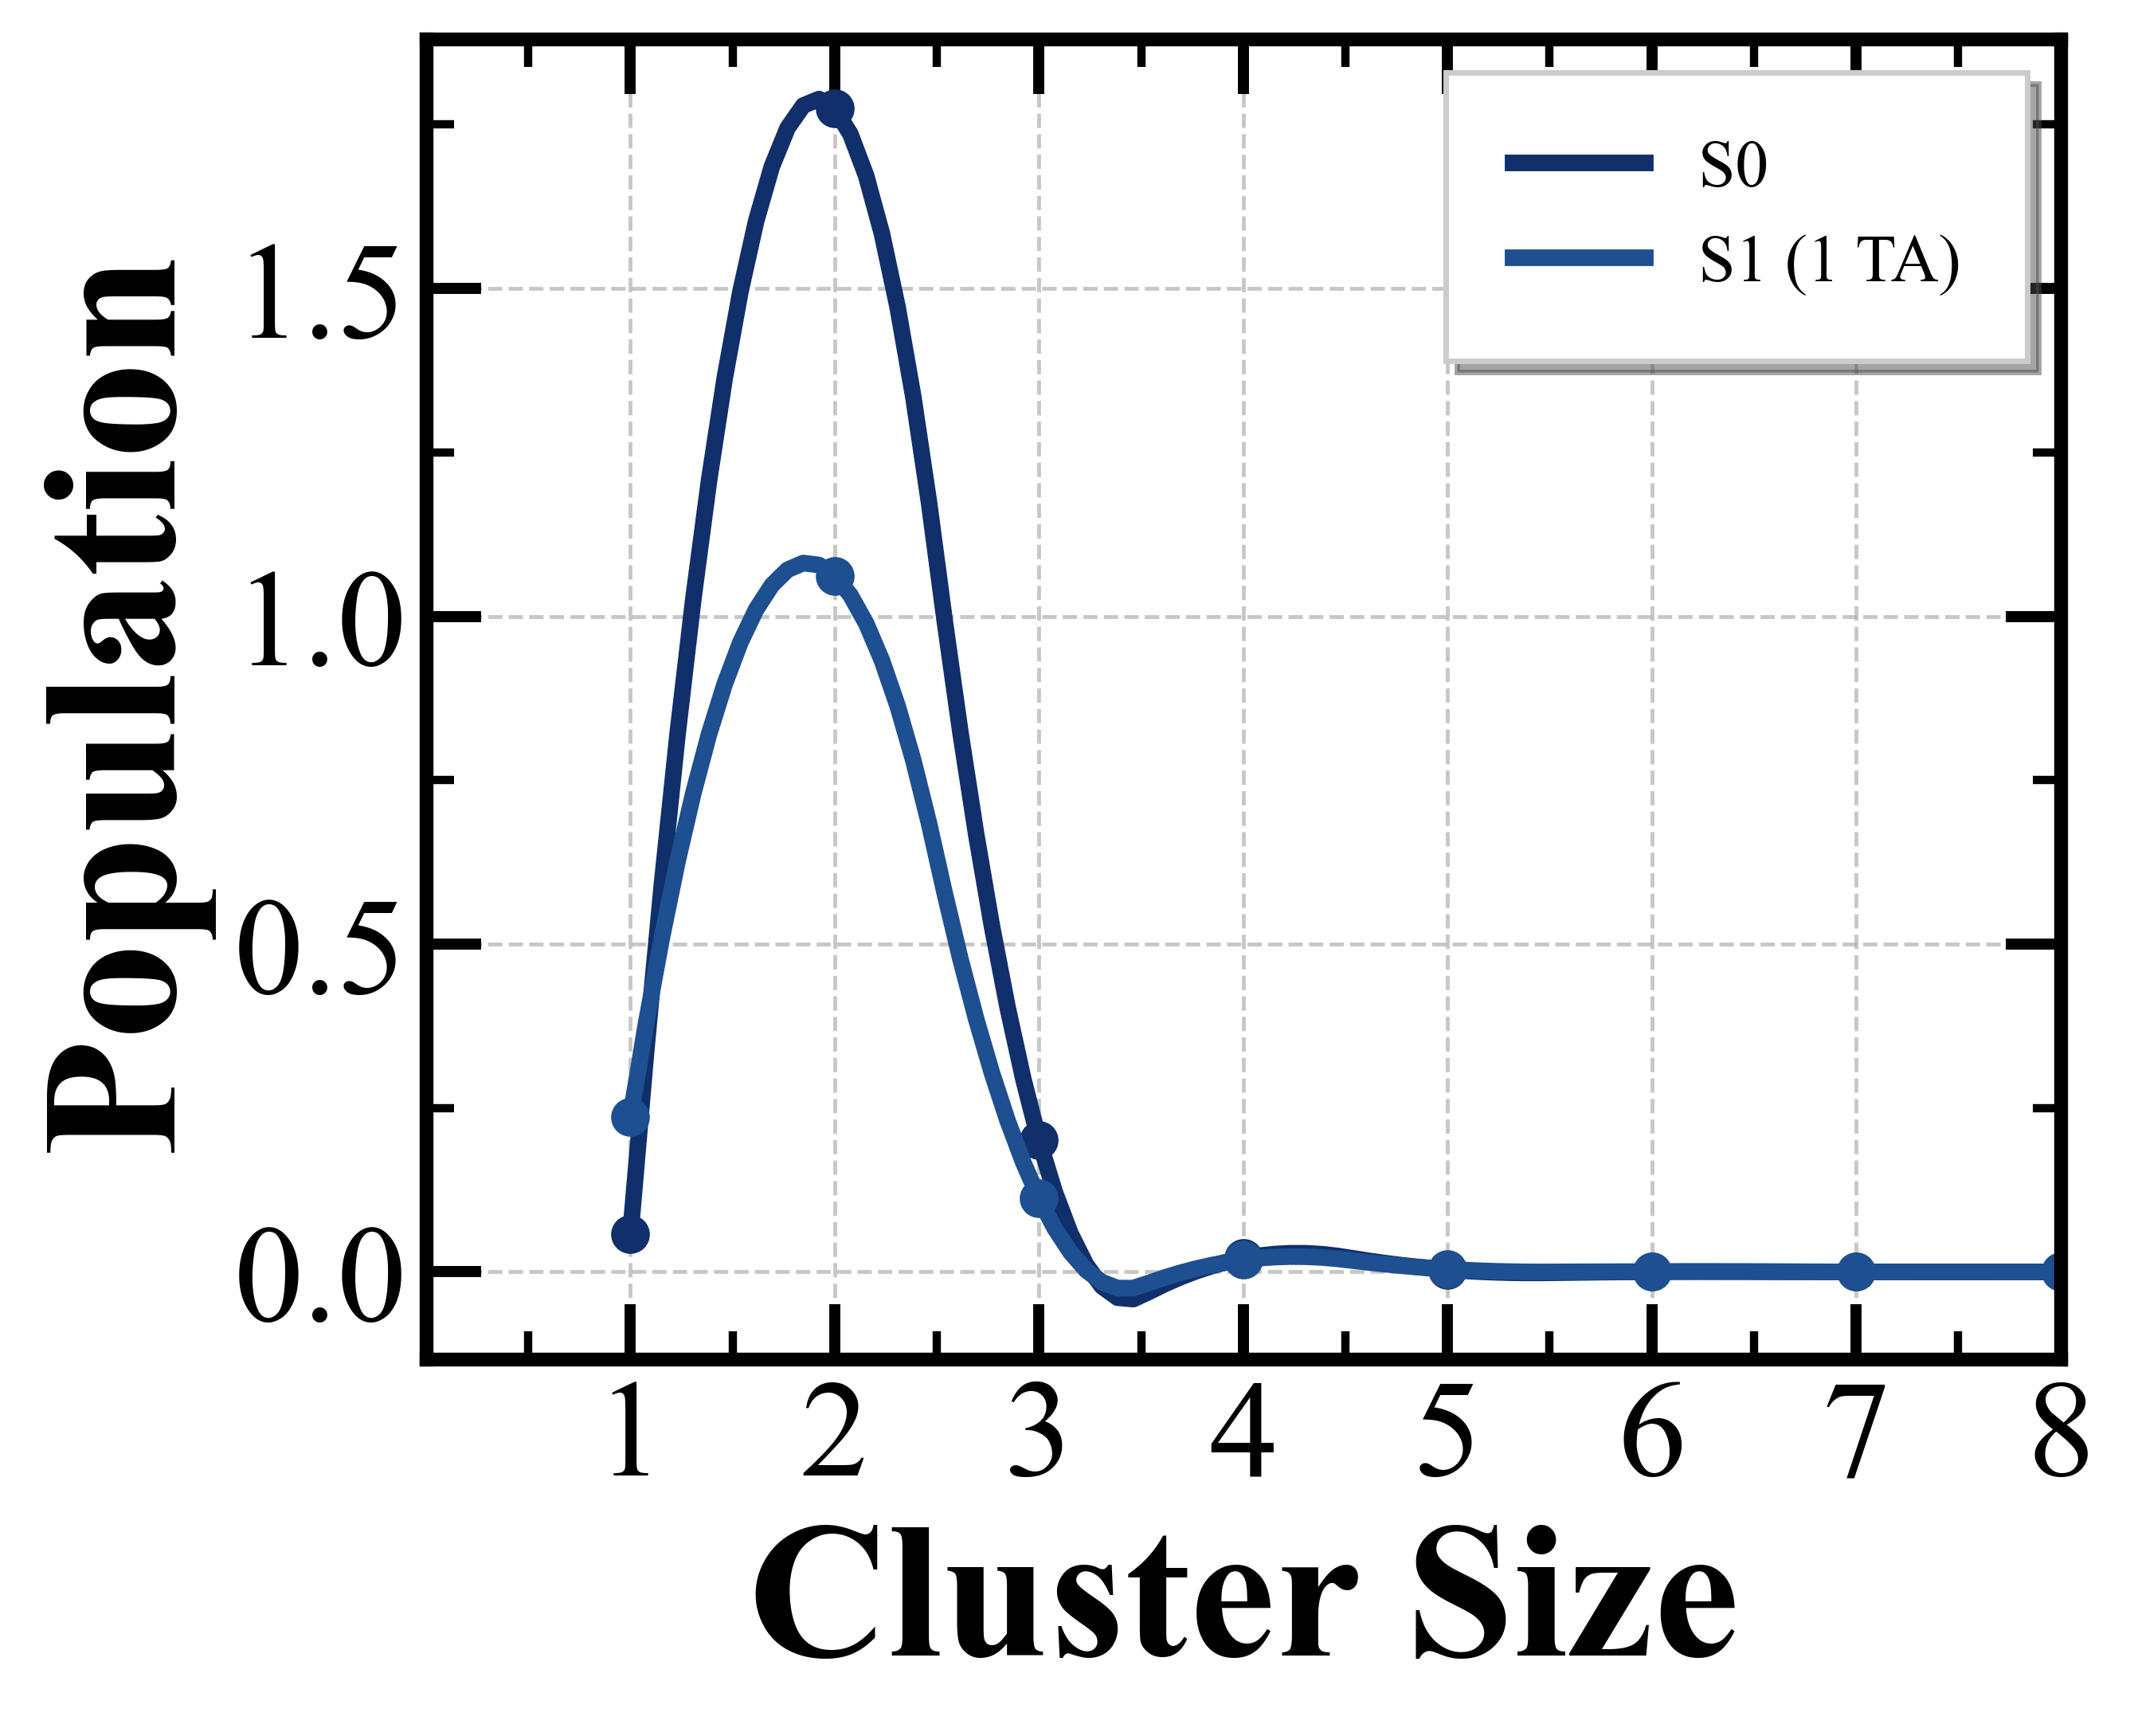

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_1ta, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_1ta, 'o', color='#1D4F91', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#1D4F91', linewidth=3, label='S1 (1 TA)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S1.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


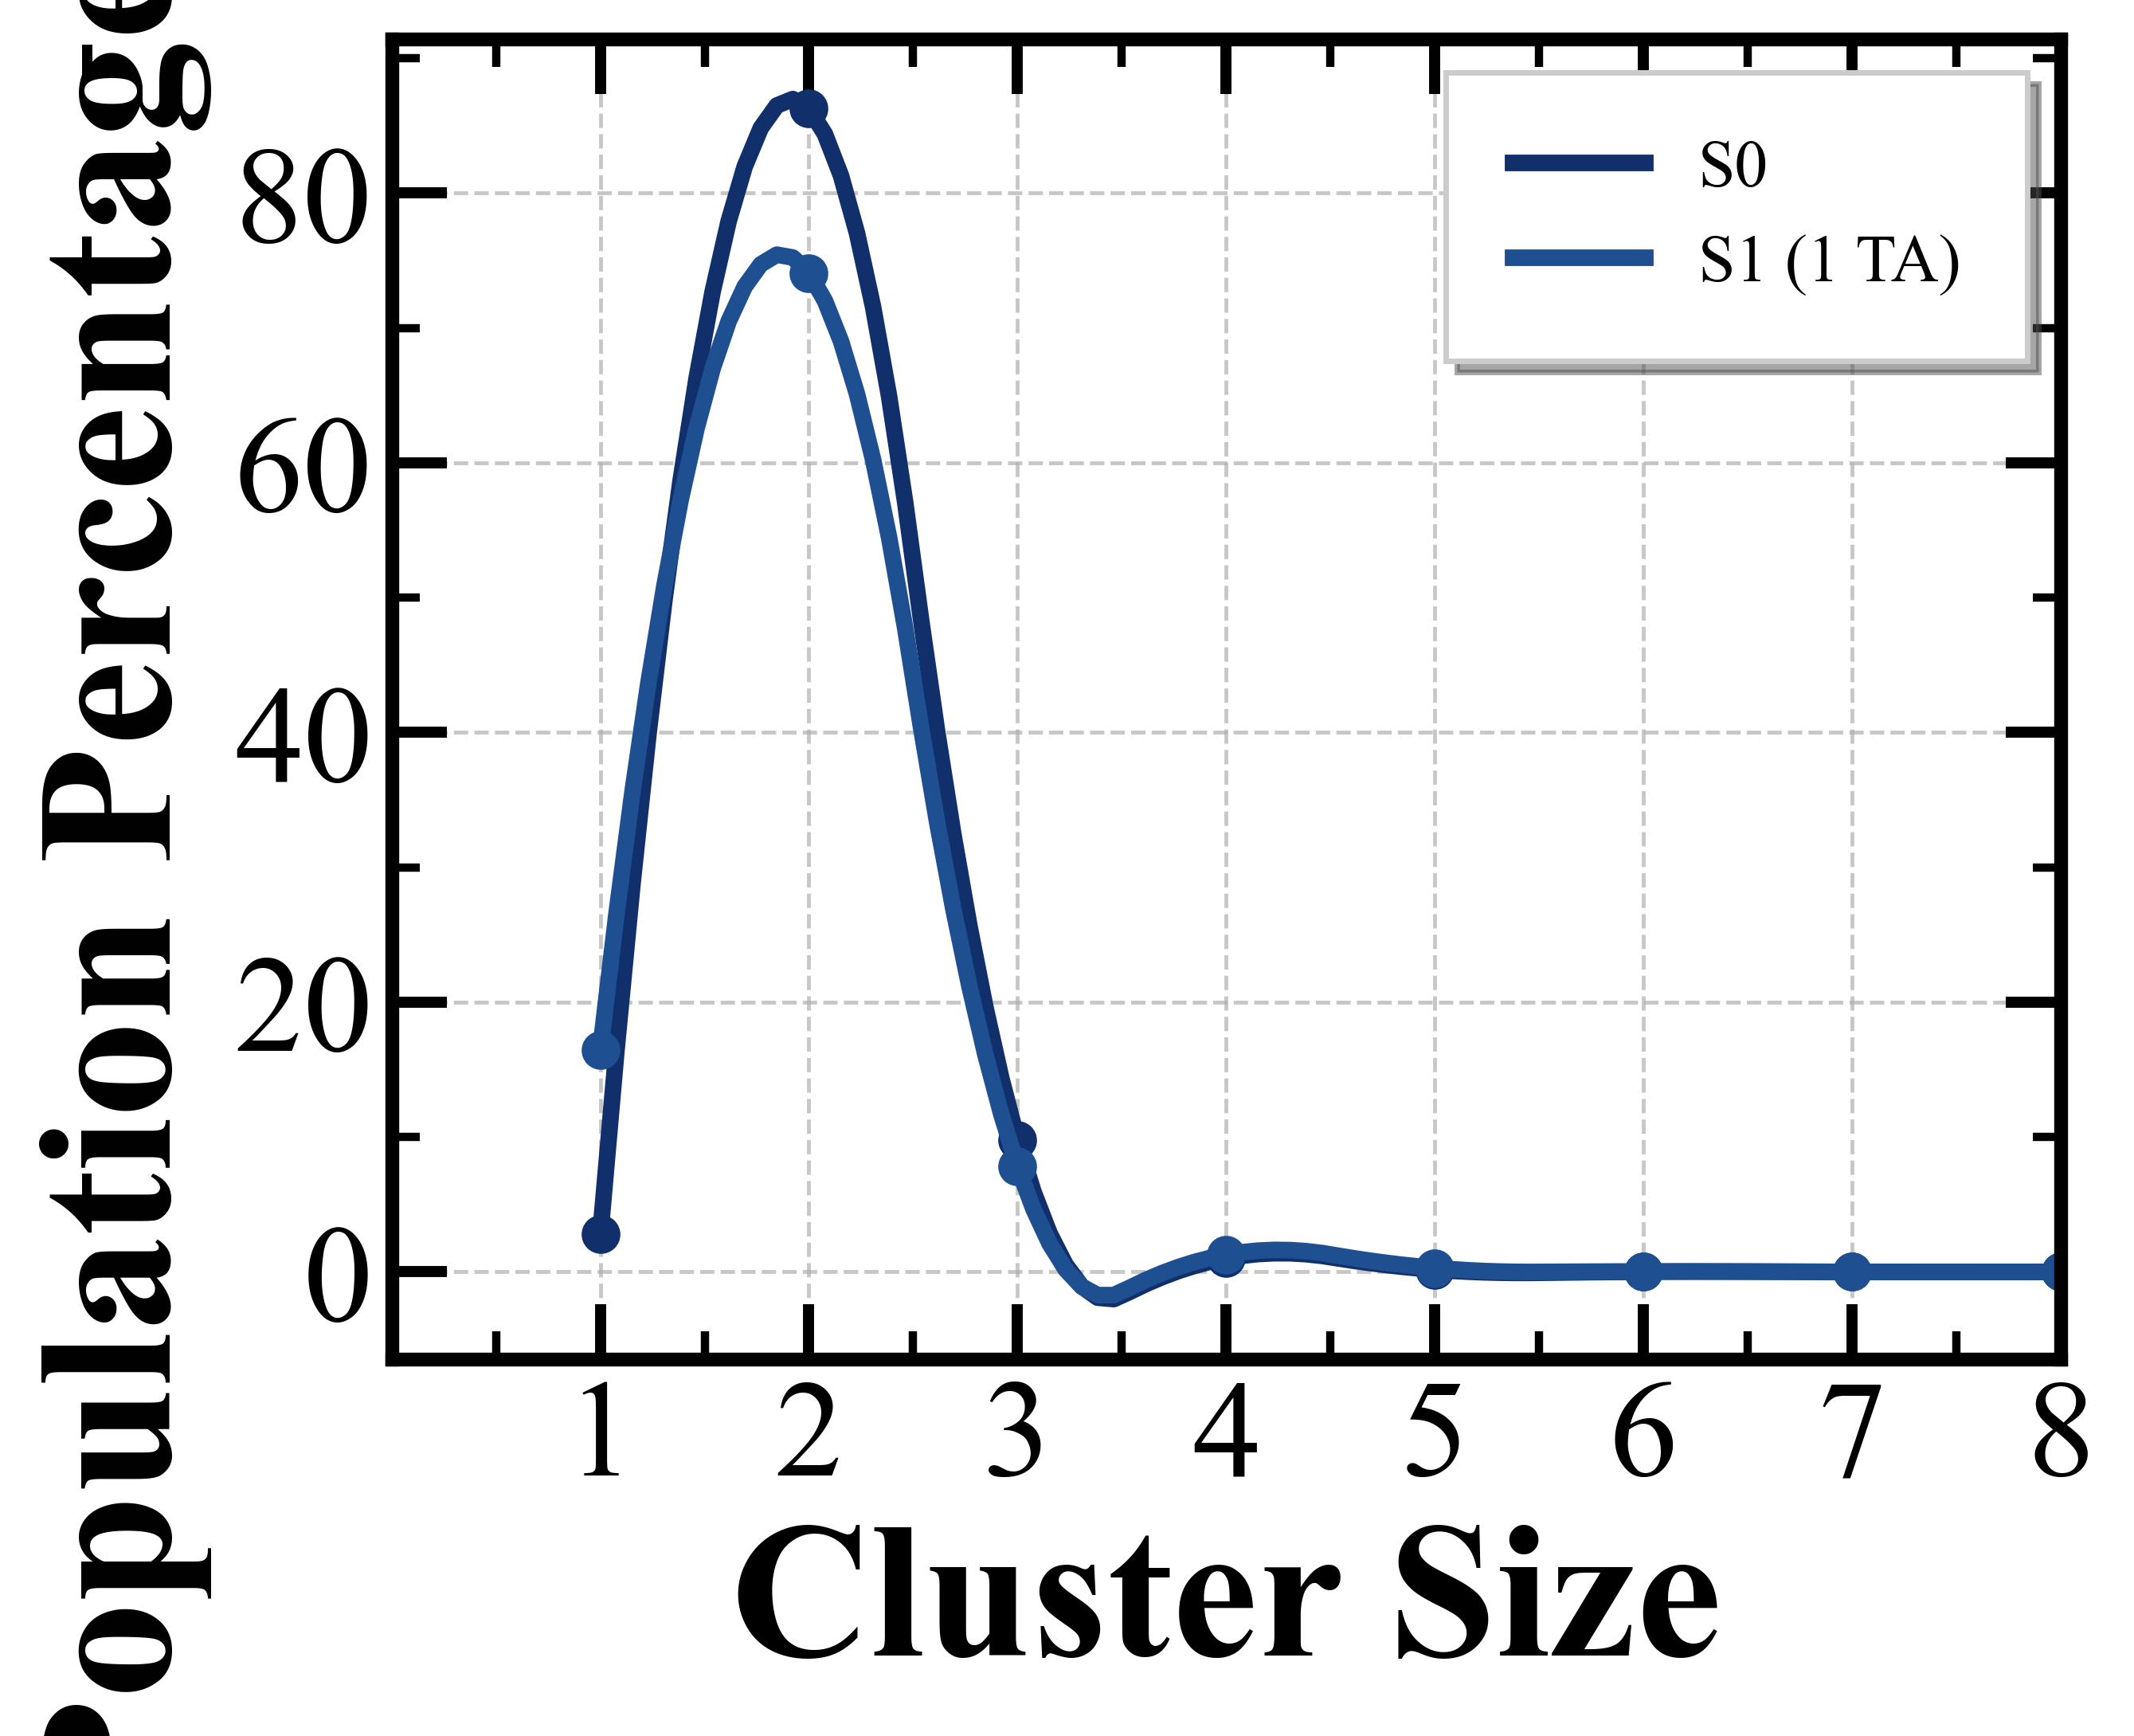

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)

# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, population_percentage, k=2)  
spl1 = make_interp_spline(bins, population_percentage_ta, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, population_percentage, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0')

ax.plot(bins, population_percentage_ta, 'o', color='#1D4F91', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#1D4F91', linewidth=3, label='S1 (1 TA)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population Percentage (%)')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 100, 20))  # Adjust based on the expected range of percentage values

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
# plt.savefig('cluster_population_percentage_S0-S1.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


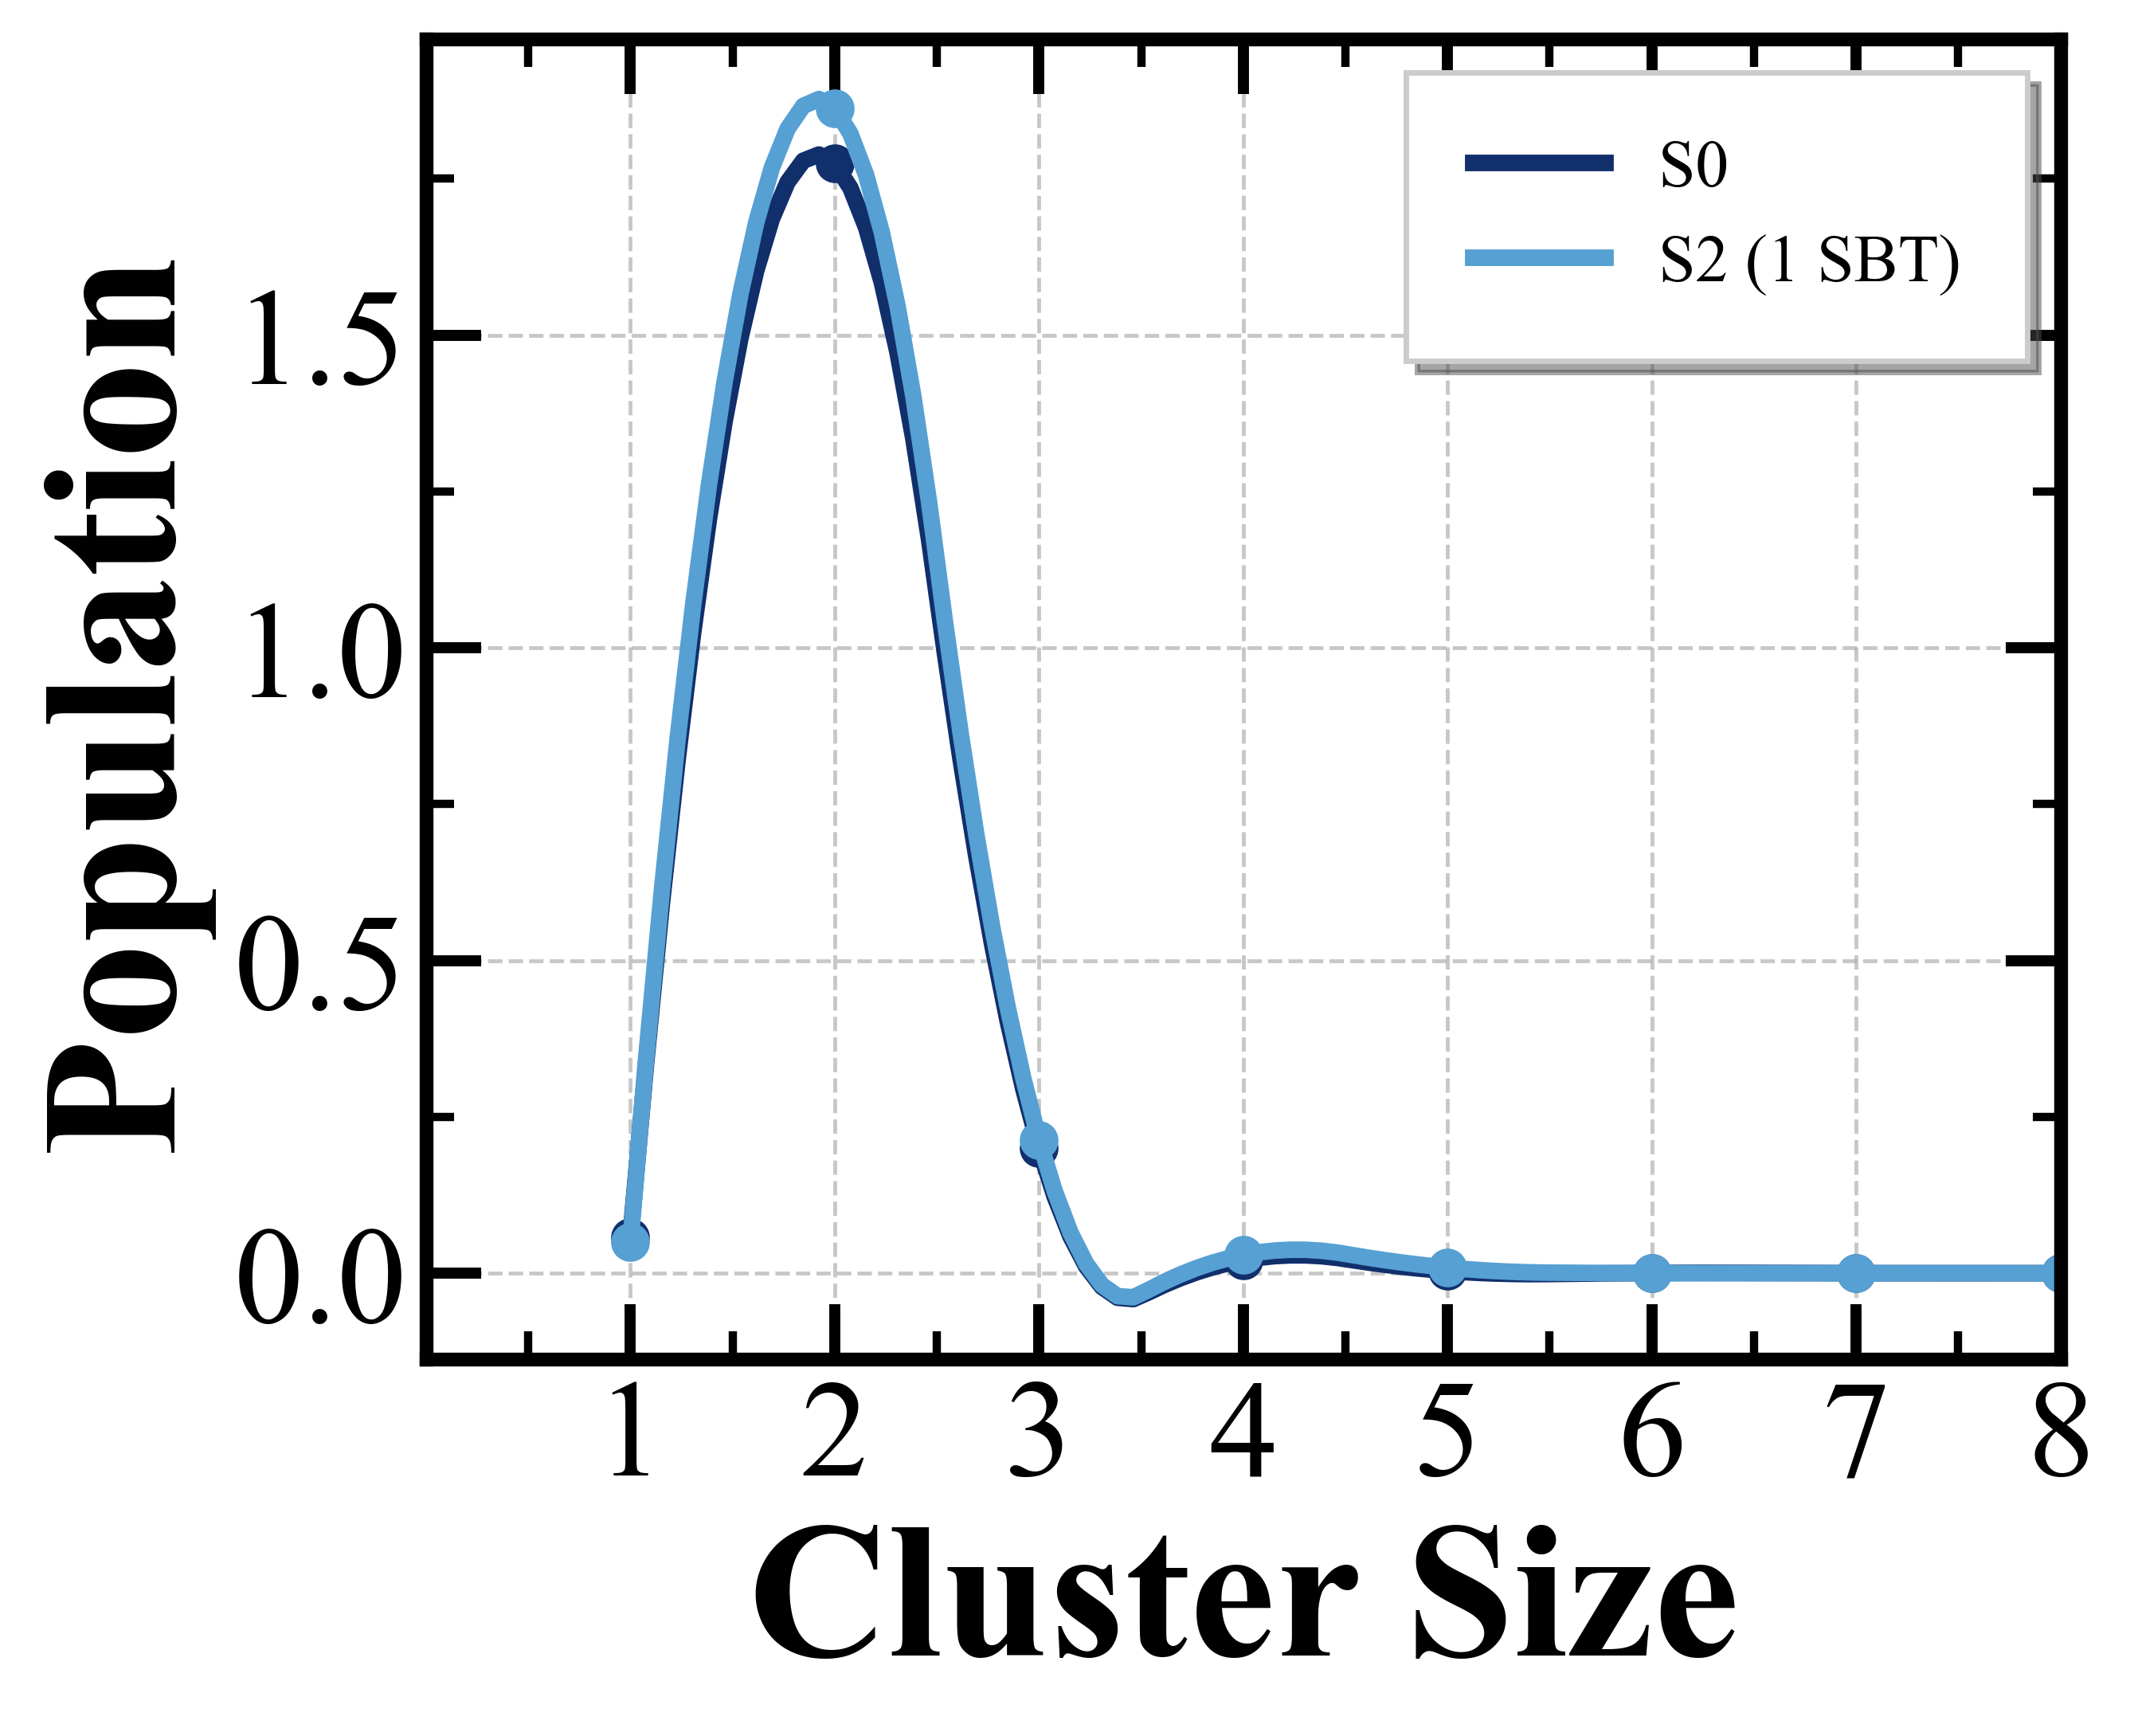

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_1sbt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_1sbt, 'o', color='#56A0D3', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#56A0D3', linewidth=3, label='S2 (1 SBT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S2.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


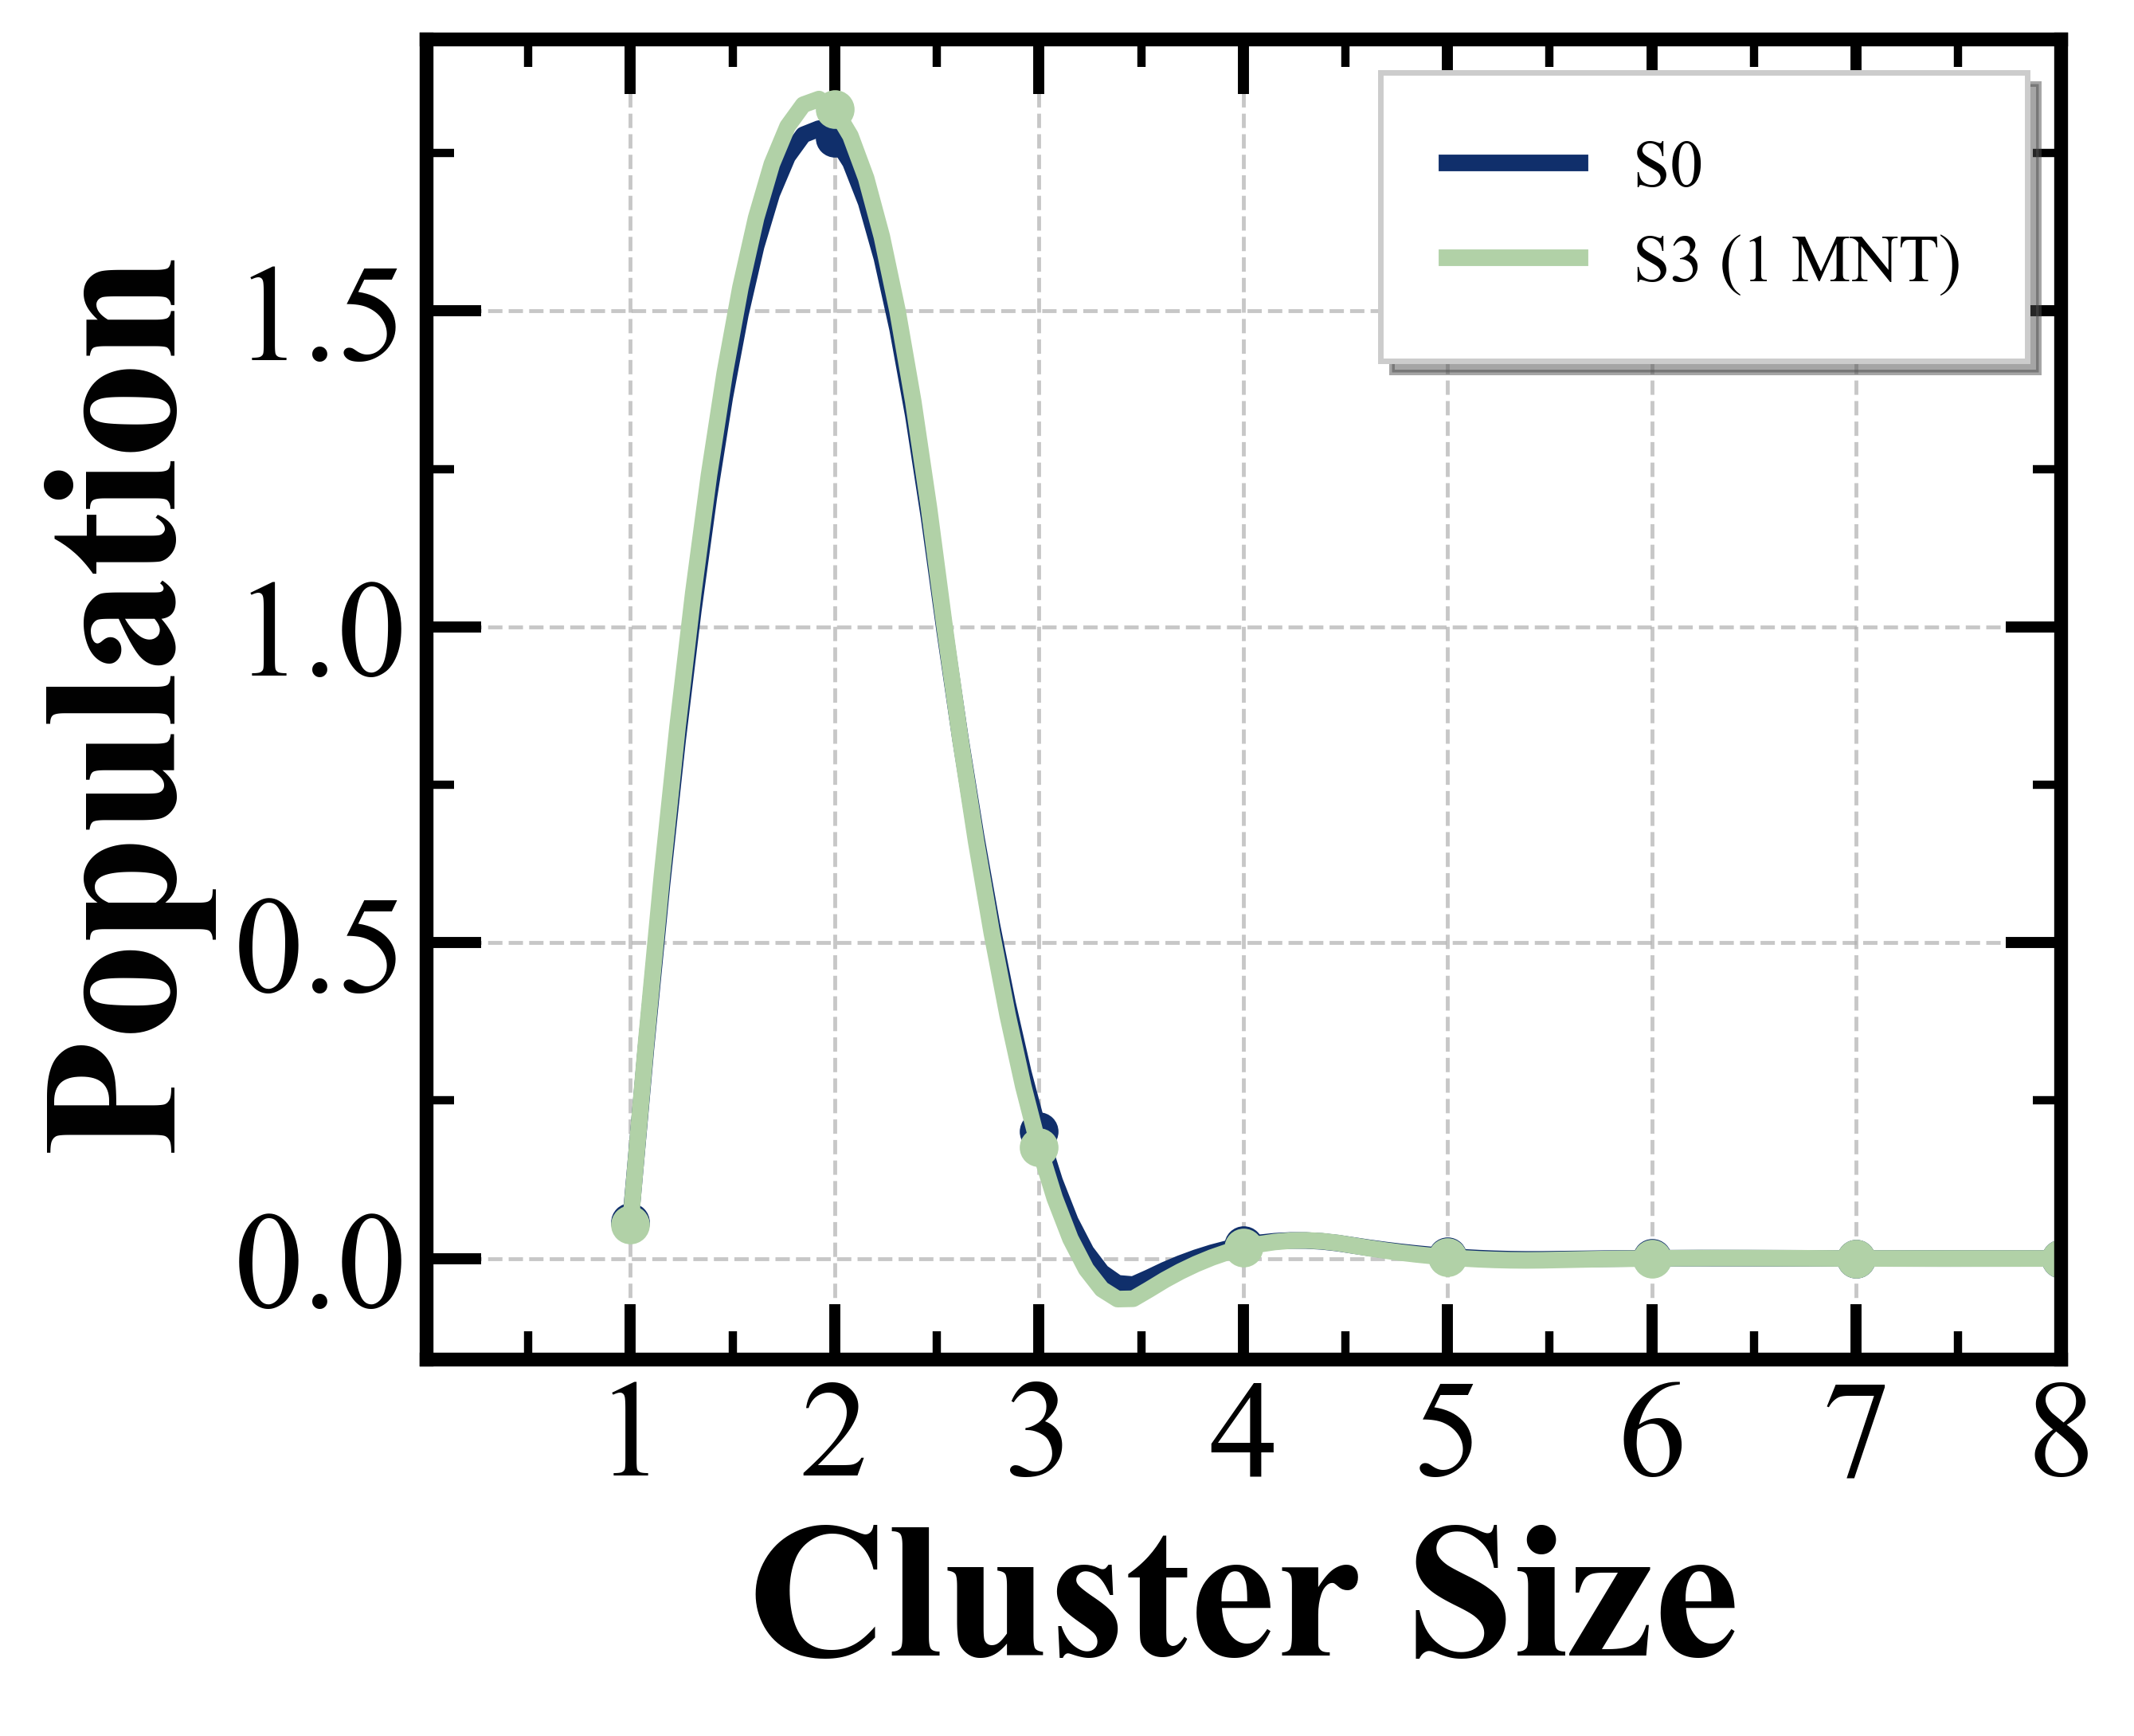

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_1mnt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_1mnt, 'o', color='#B1D1A7', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#B1D1A7', linewidth=3, label='S3 (1 MNT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S3.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


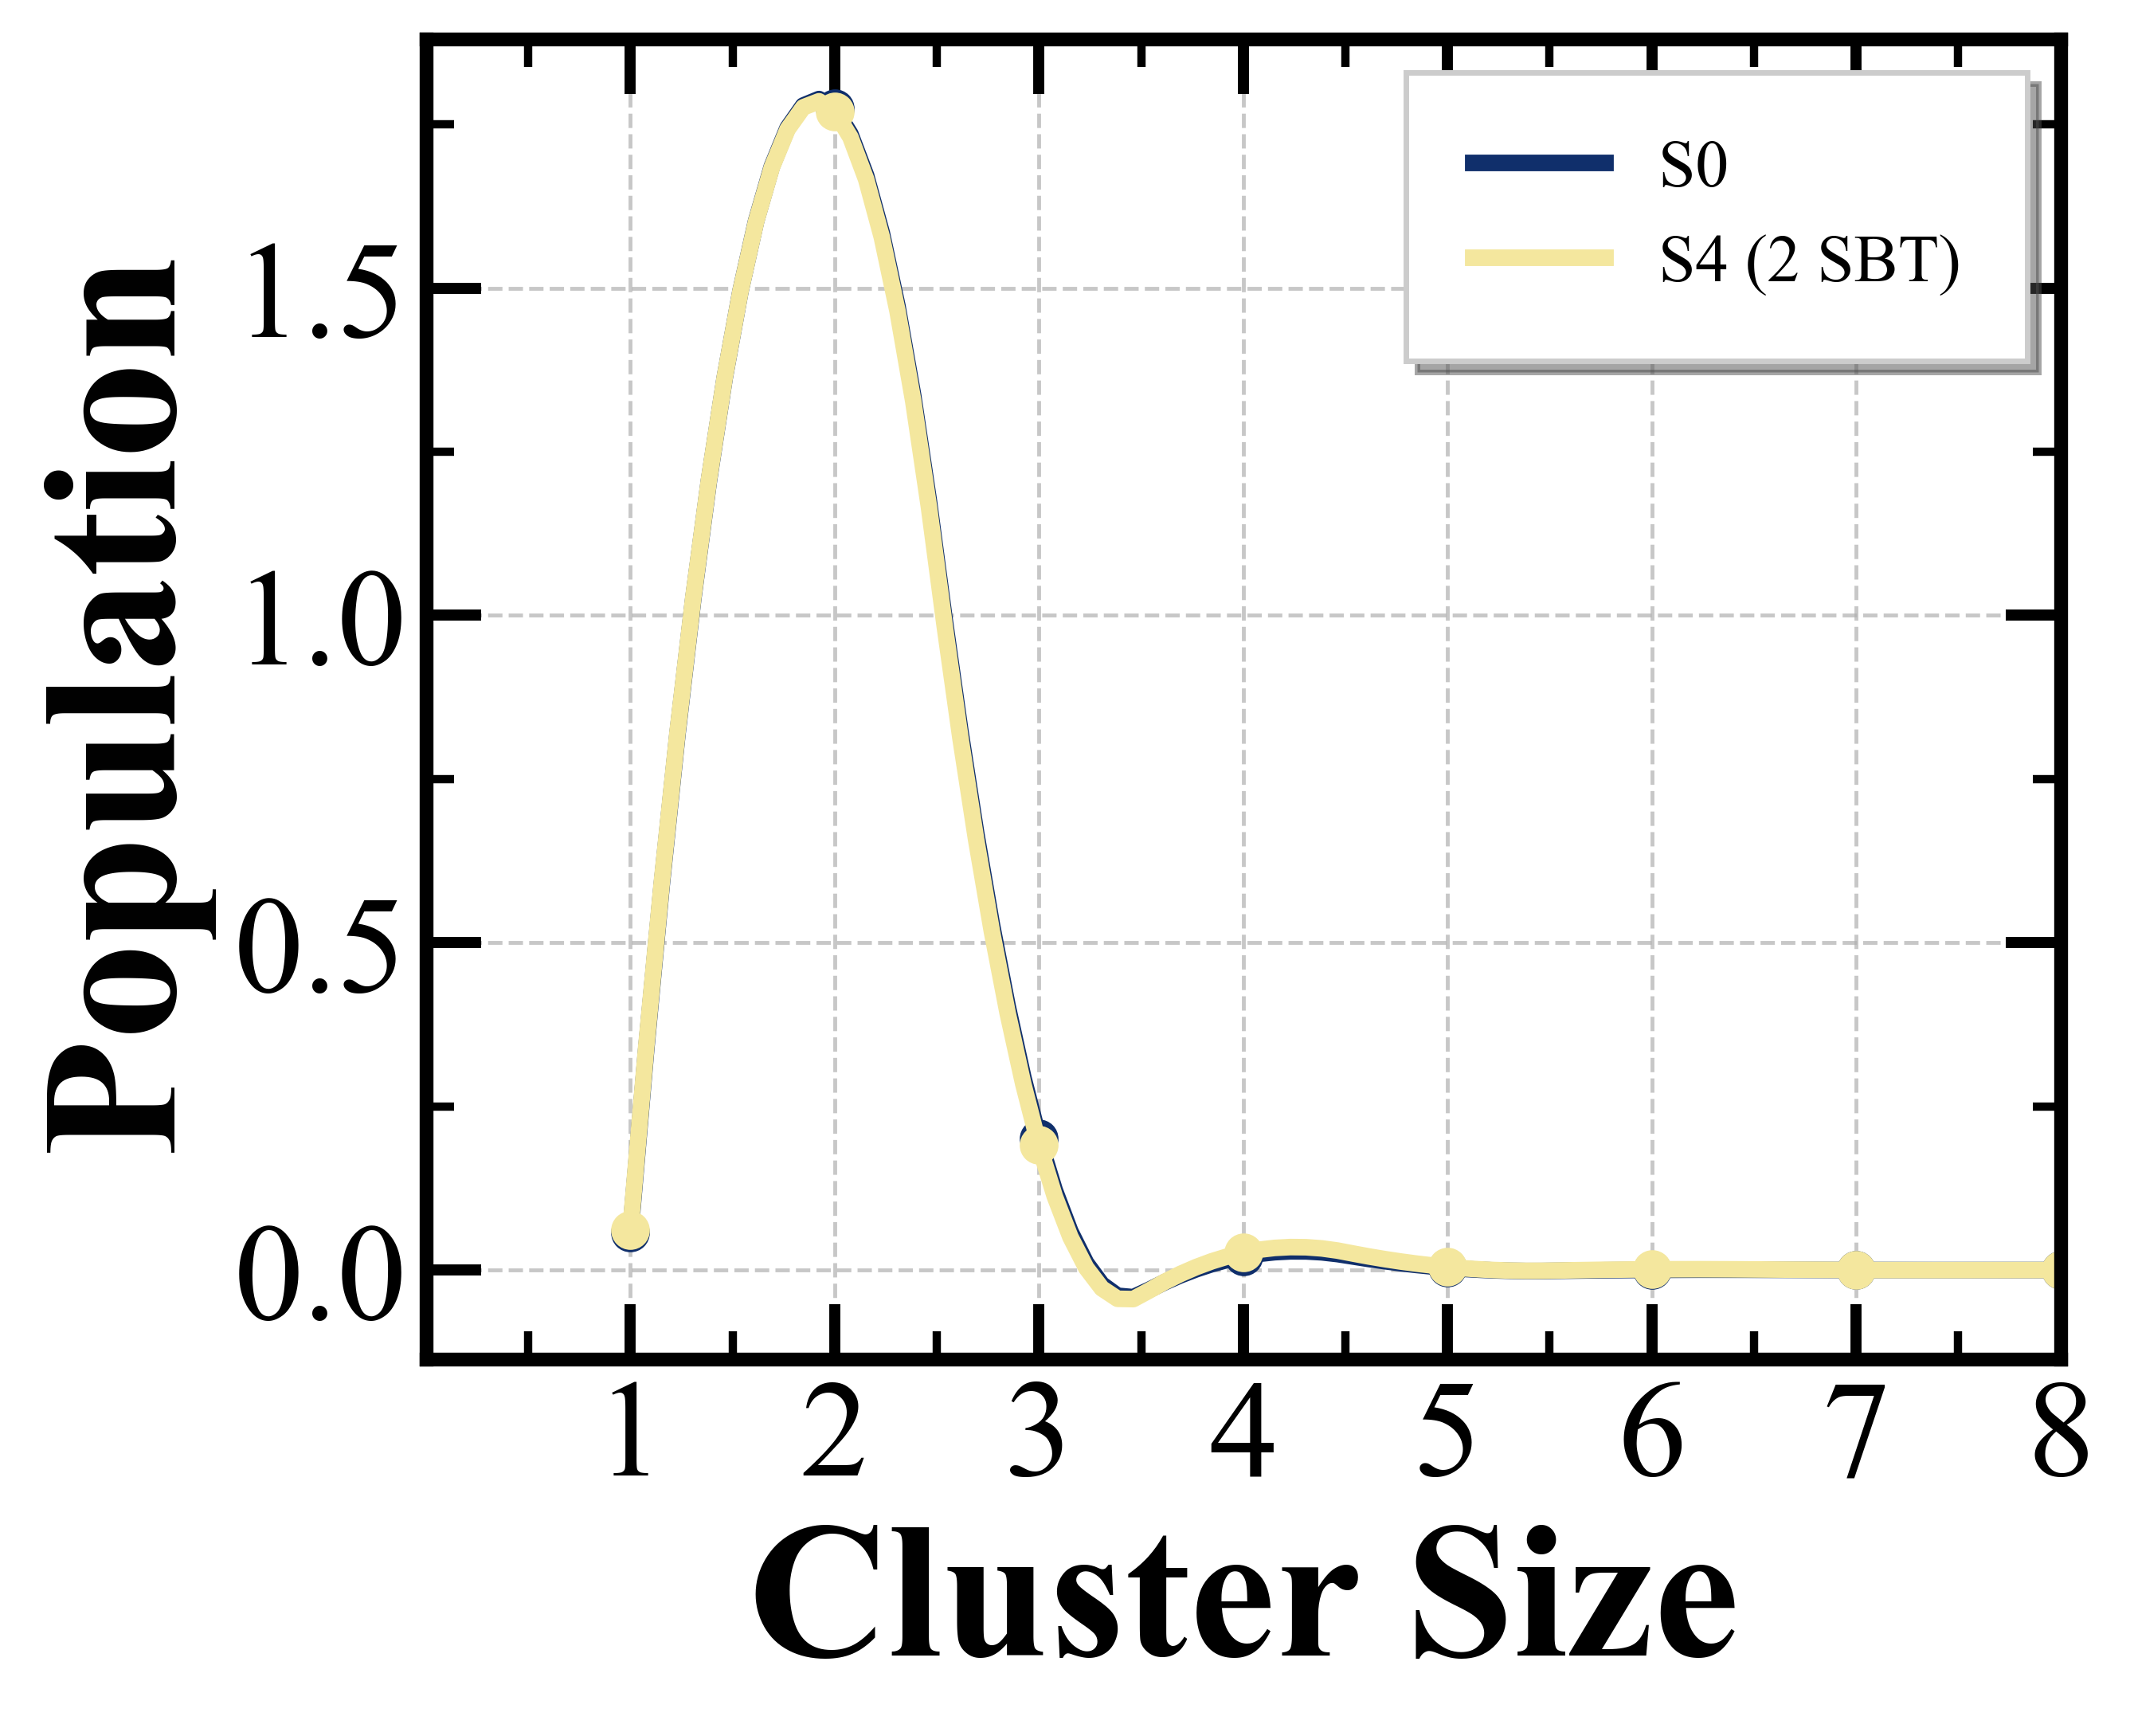

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_2sbt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_2sbt, 'o', color='#F4E79E', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#F4E79E', linewidth=3, label='S4 (2 SBT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S4.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


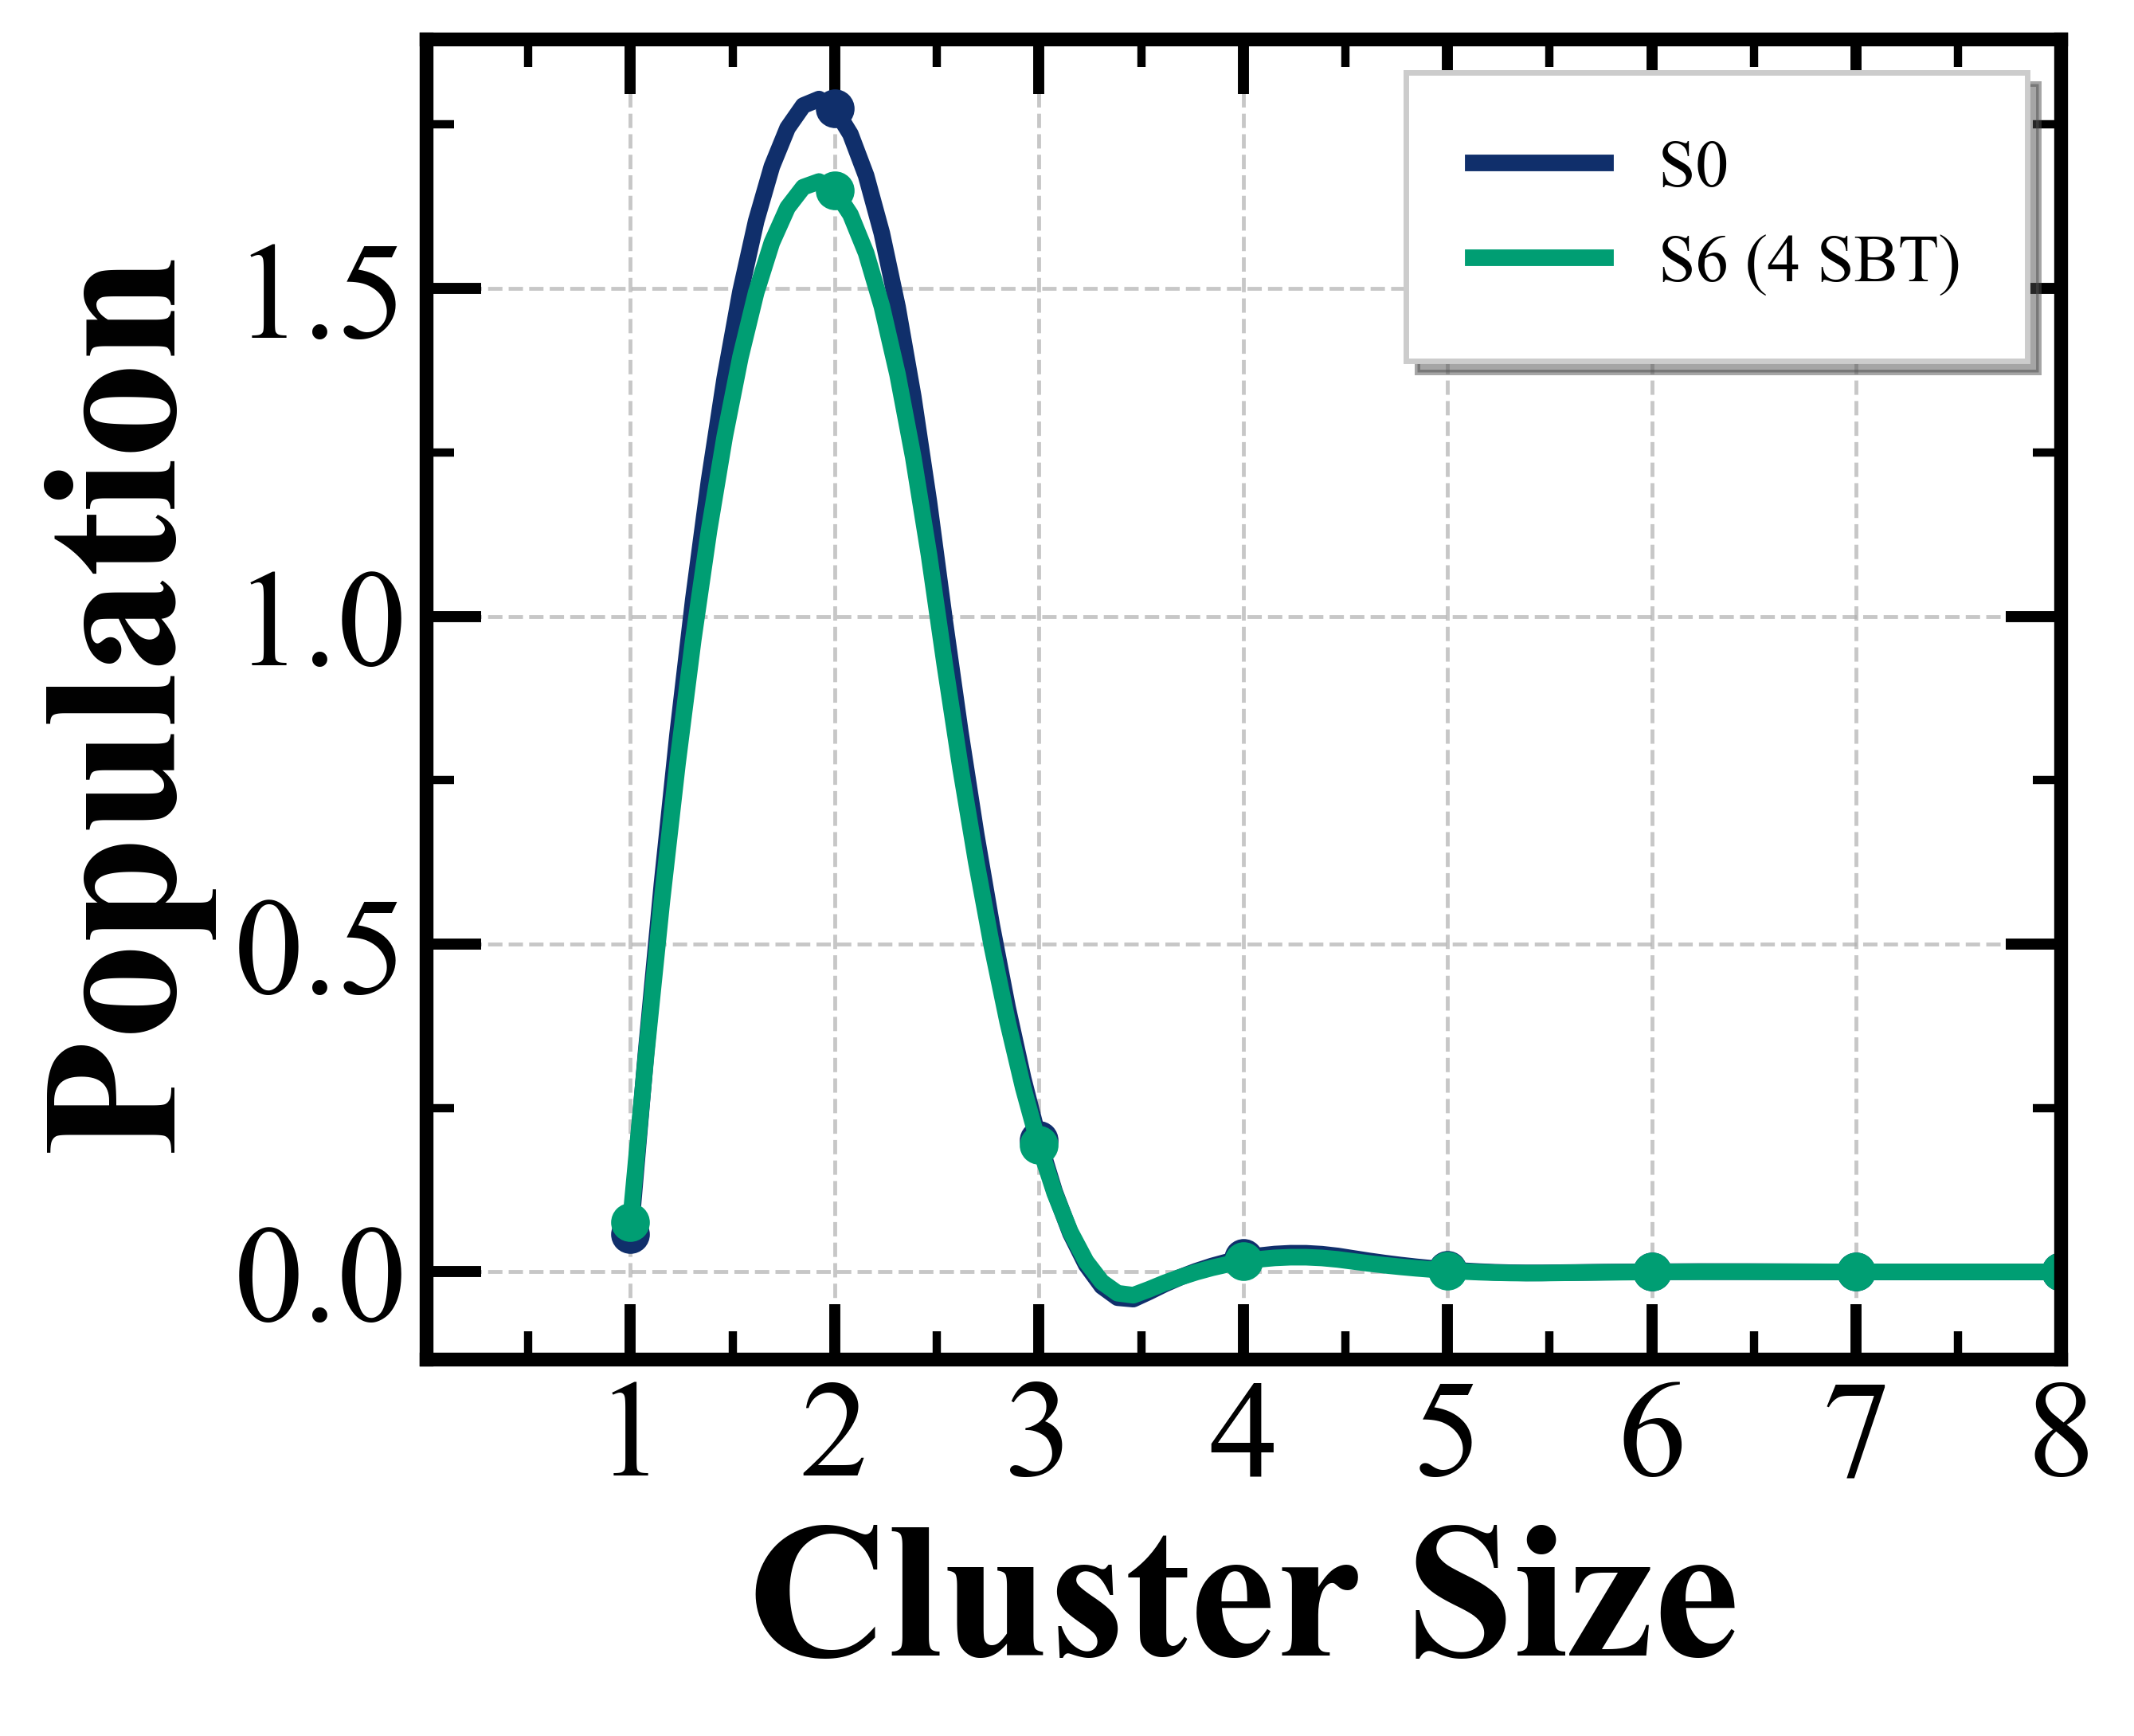

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_4sbt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_4sbt, 'o', color='#009E73', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#009E73', linewidth=3, label='S6 (4 SBT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S6.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


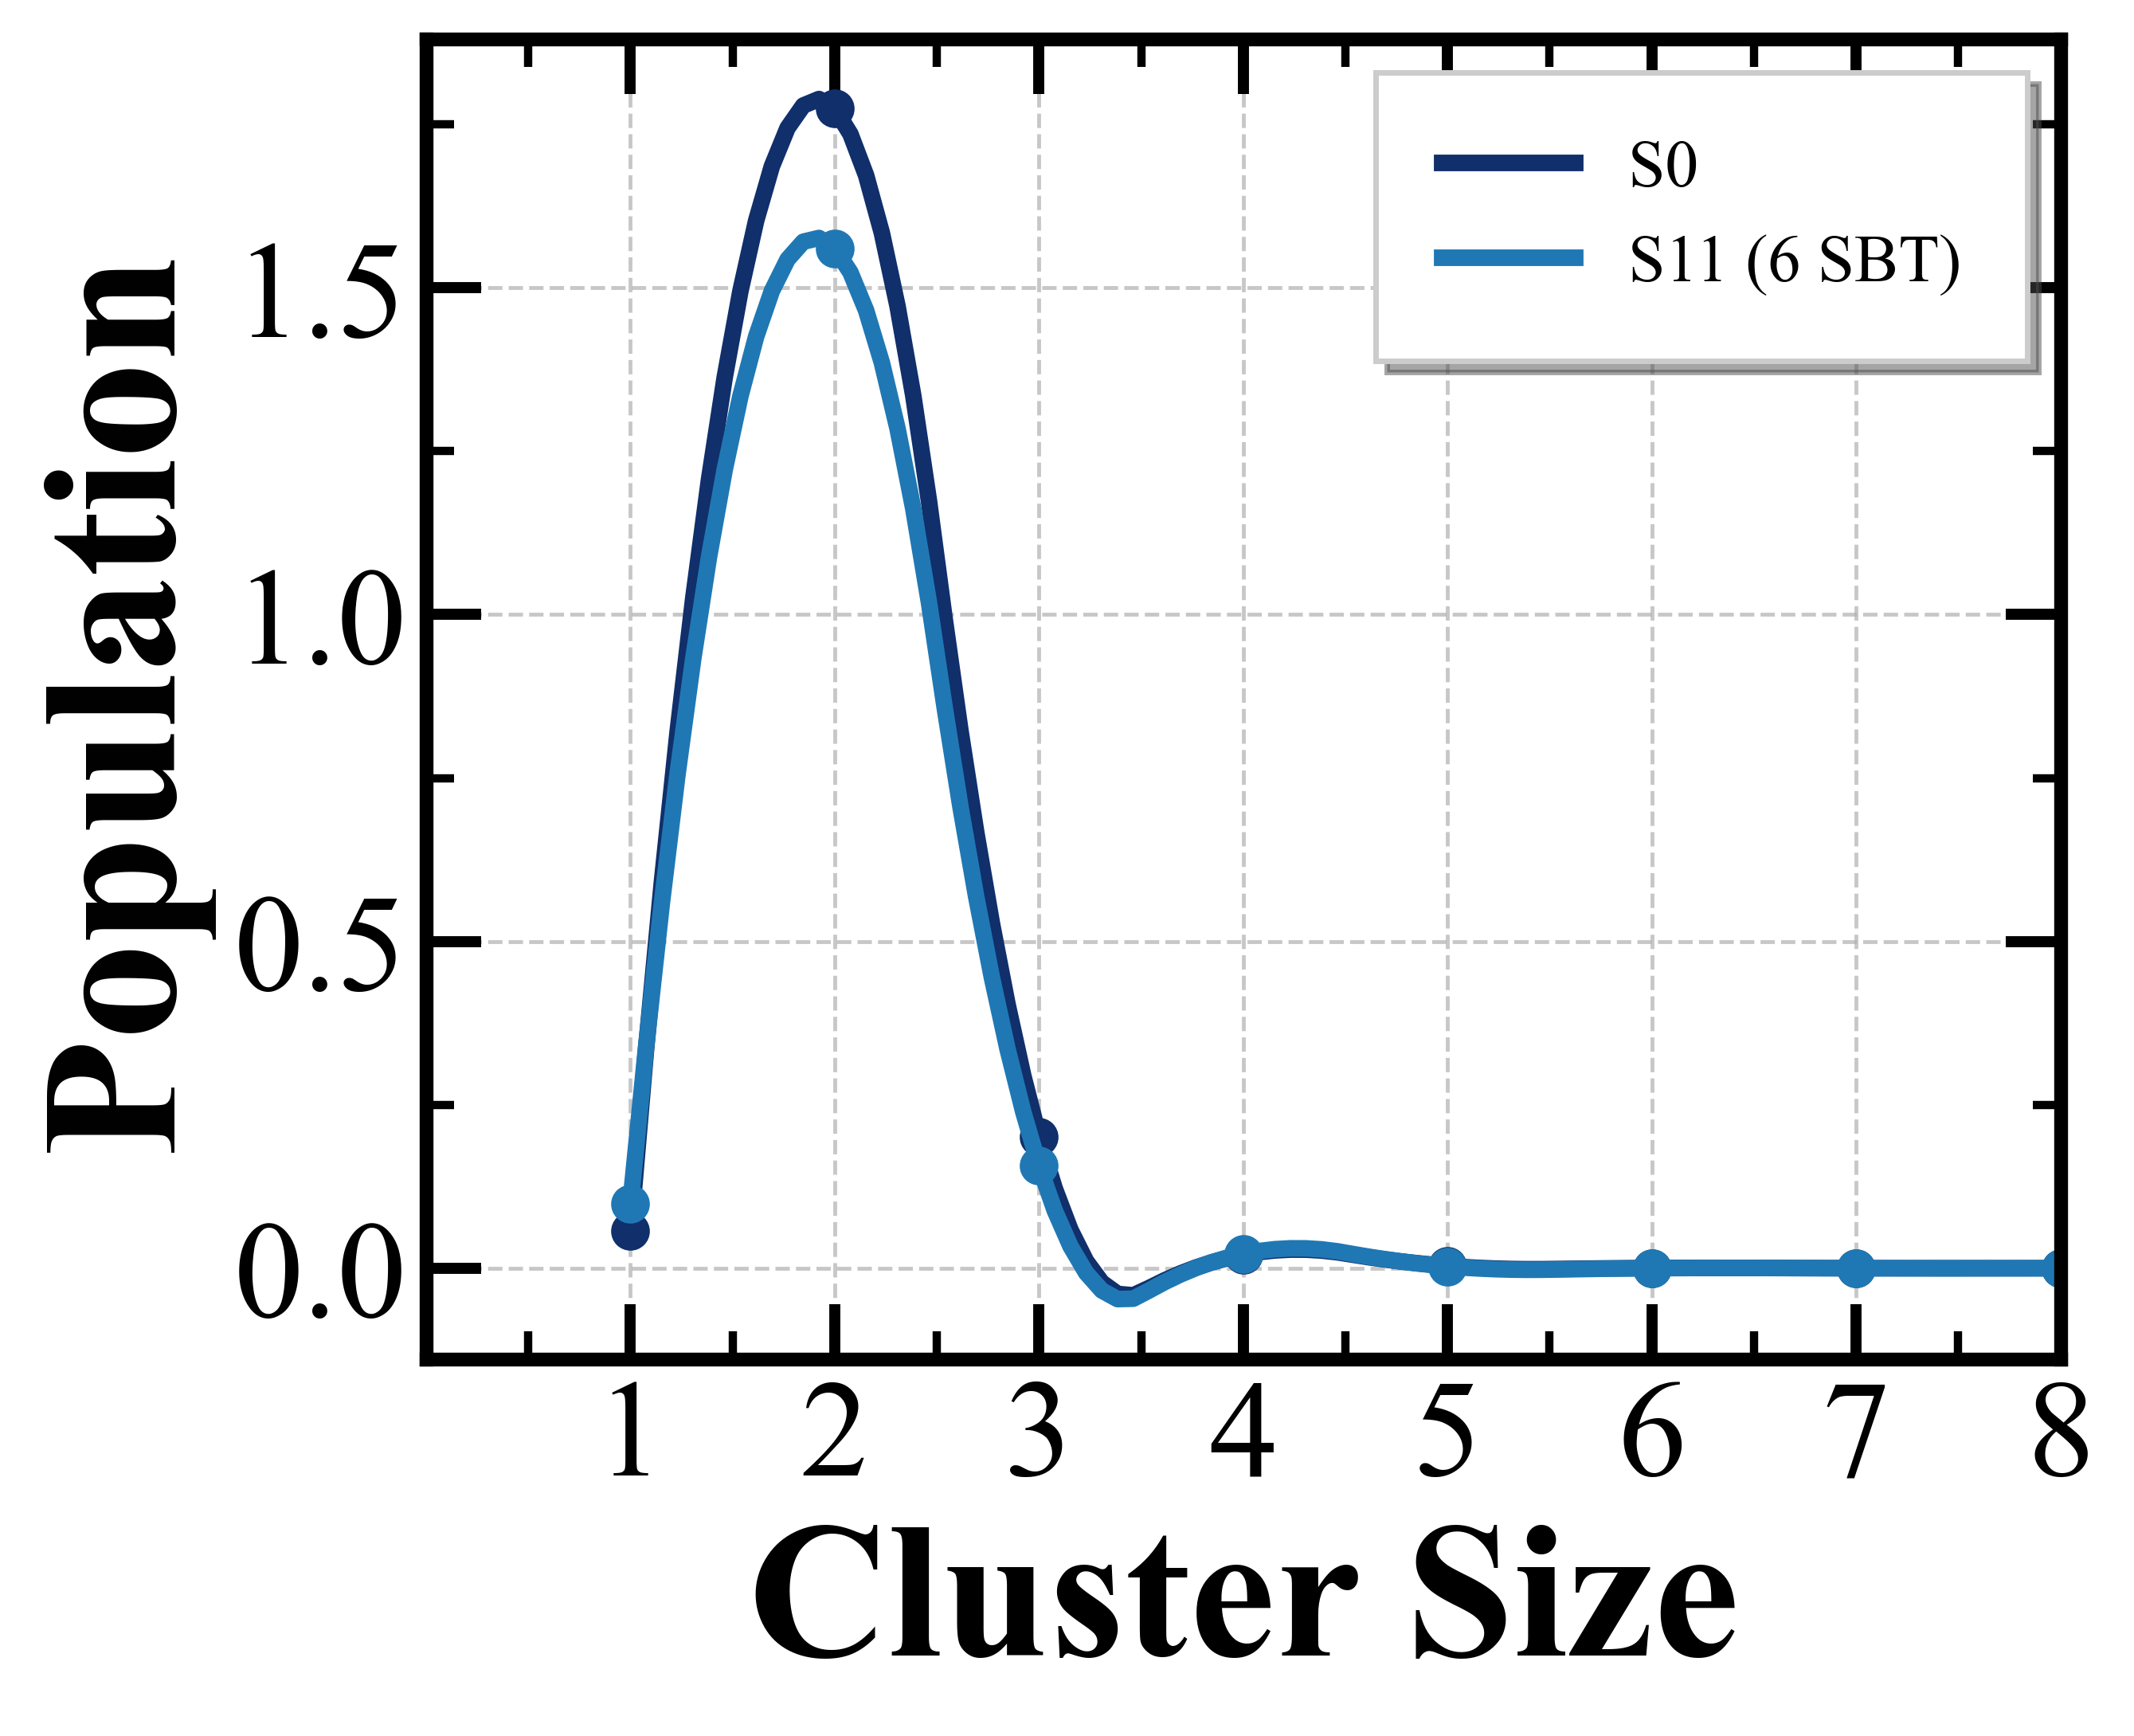

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_6sbt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_6sbt, 'o', color='#1F78B4', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#1F78B4', linewidth=3, label='S11 (6 SBT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S11.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


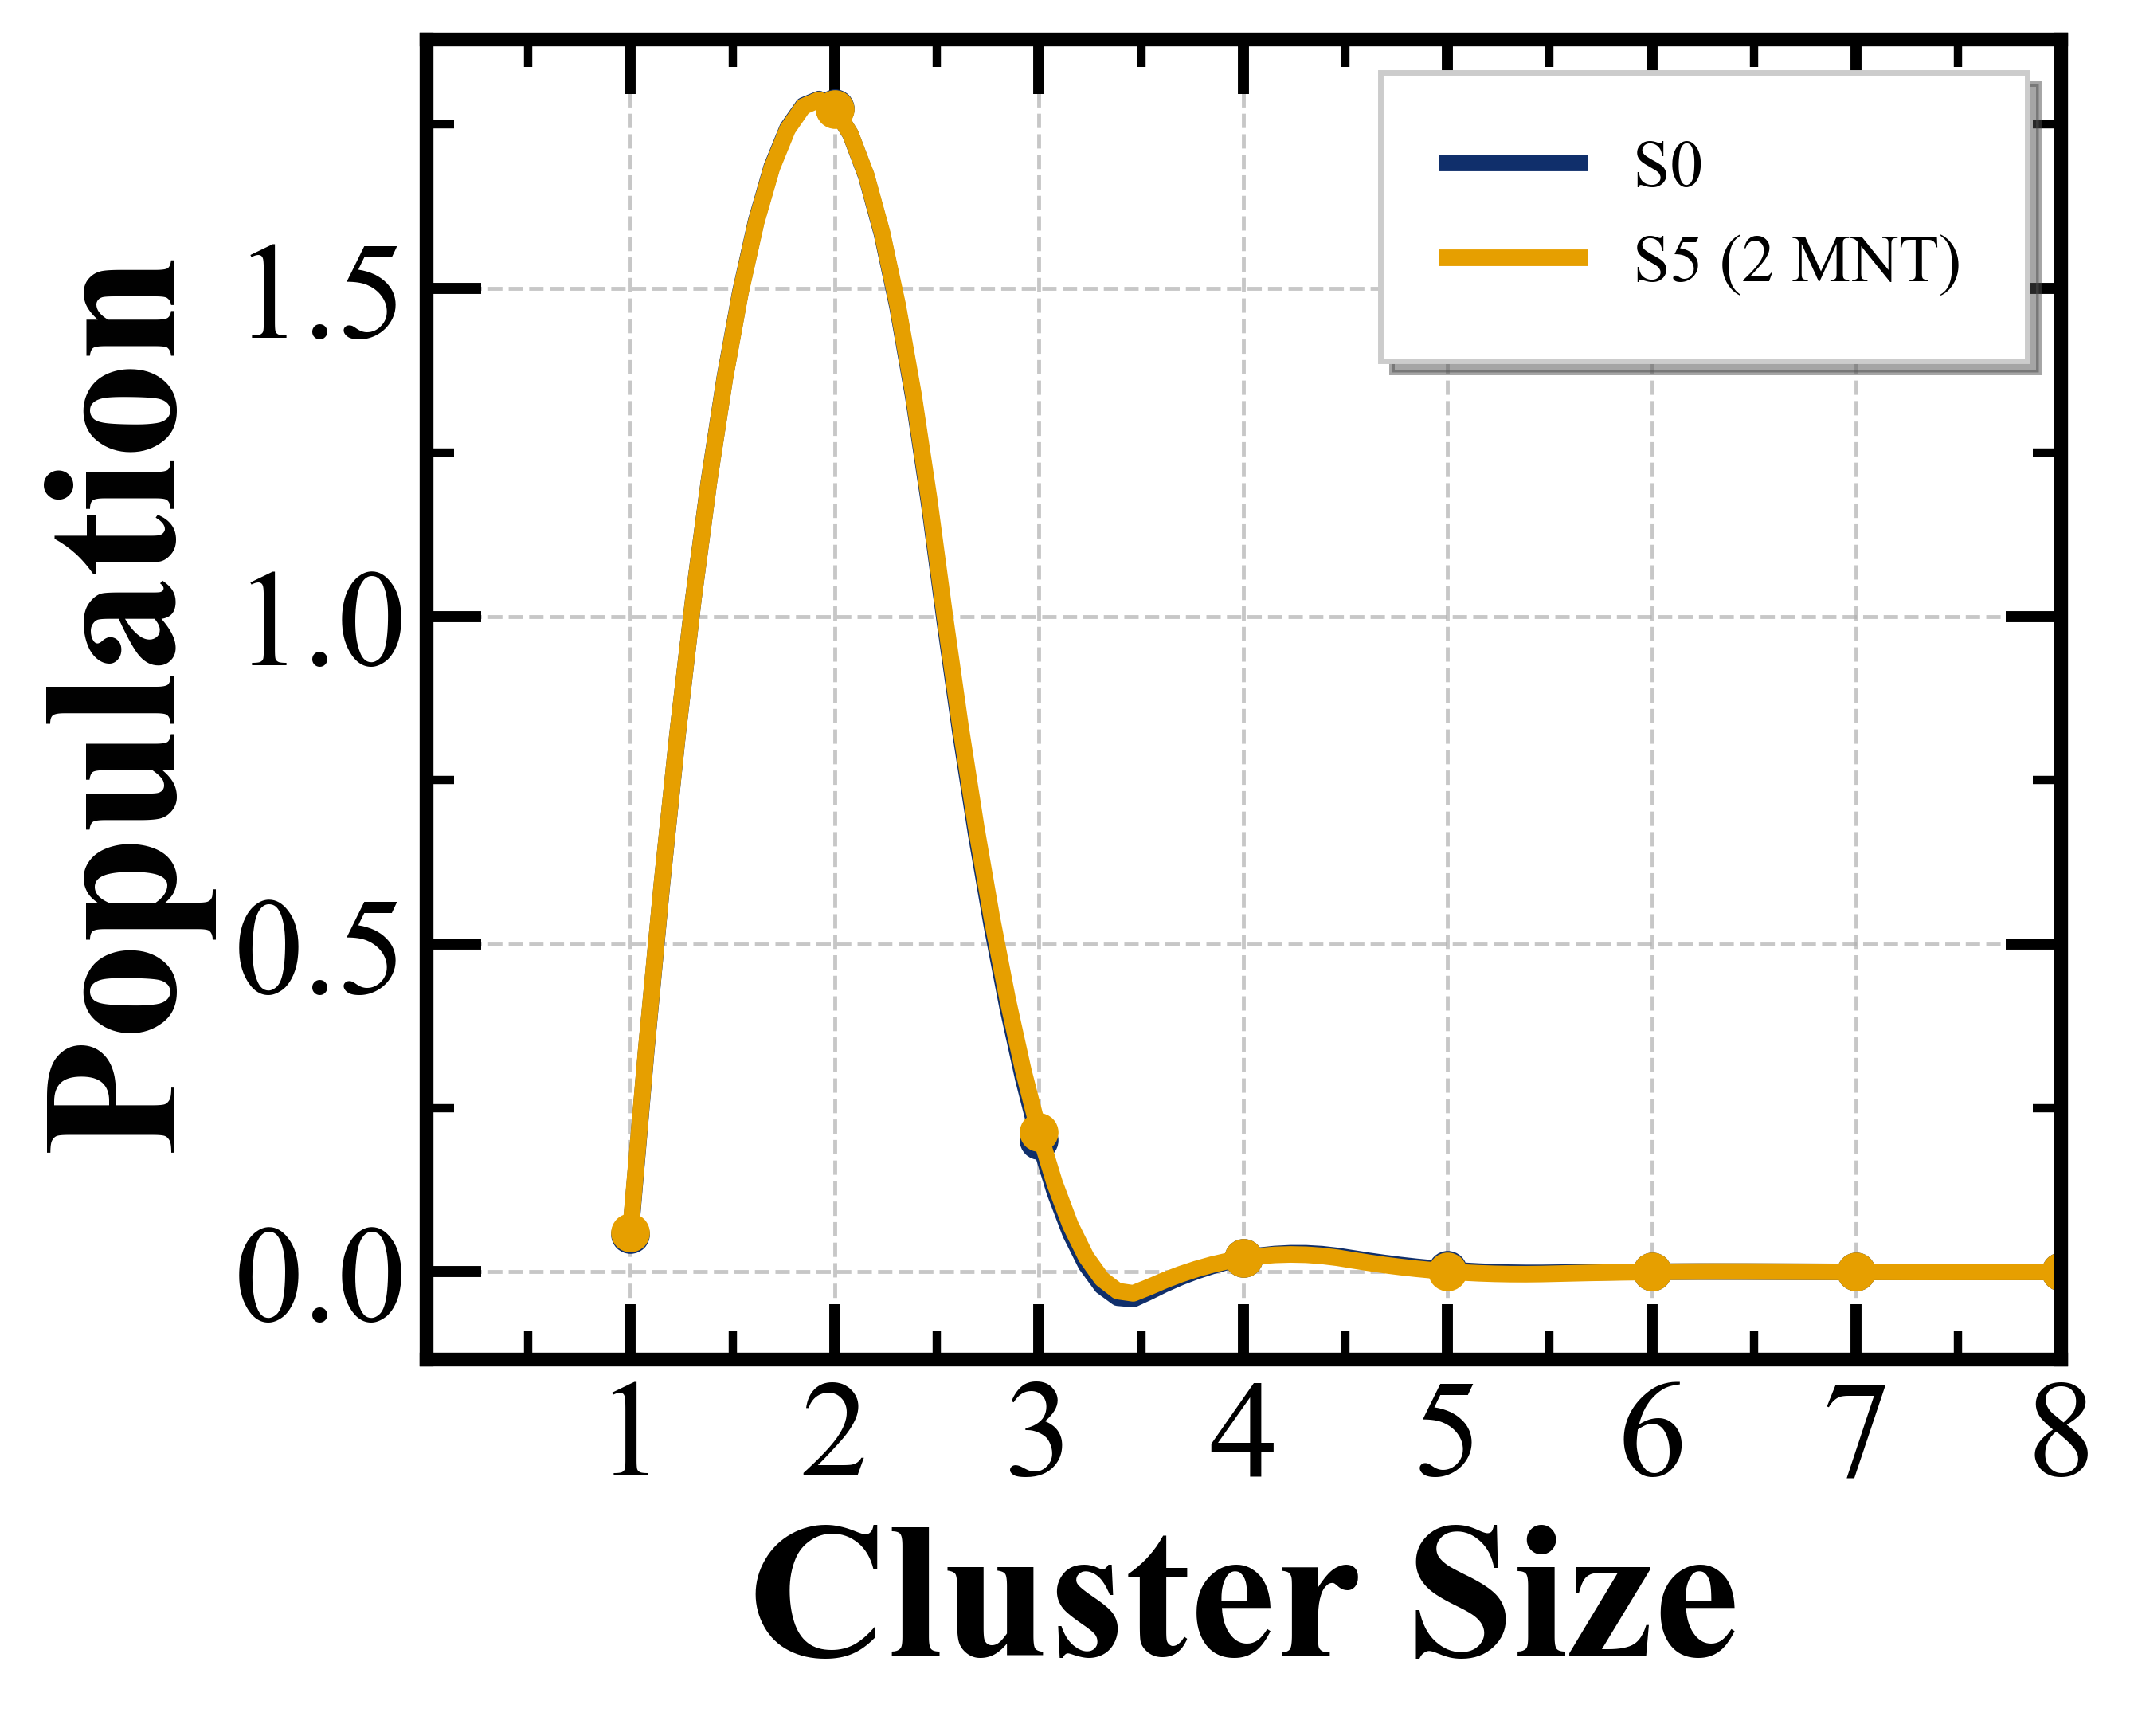

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_2mnt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_2mnt, 'o', color='#E69F00', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#E69F00', linewidth=3, label='S5 (2 MNT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S5.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


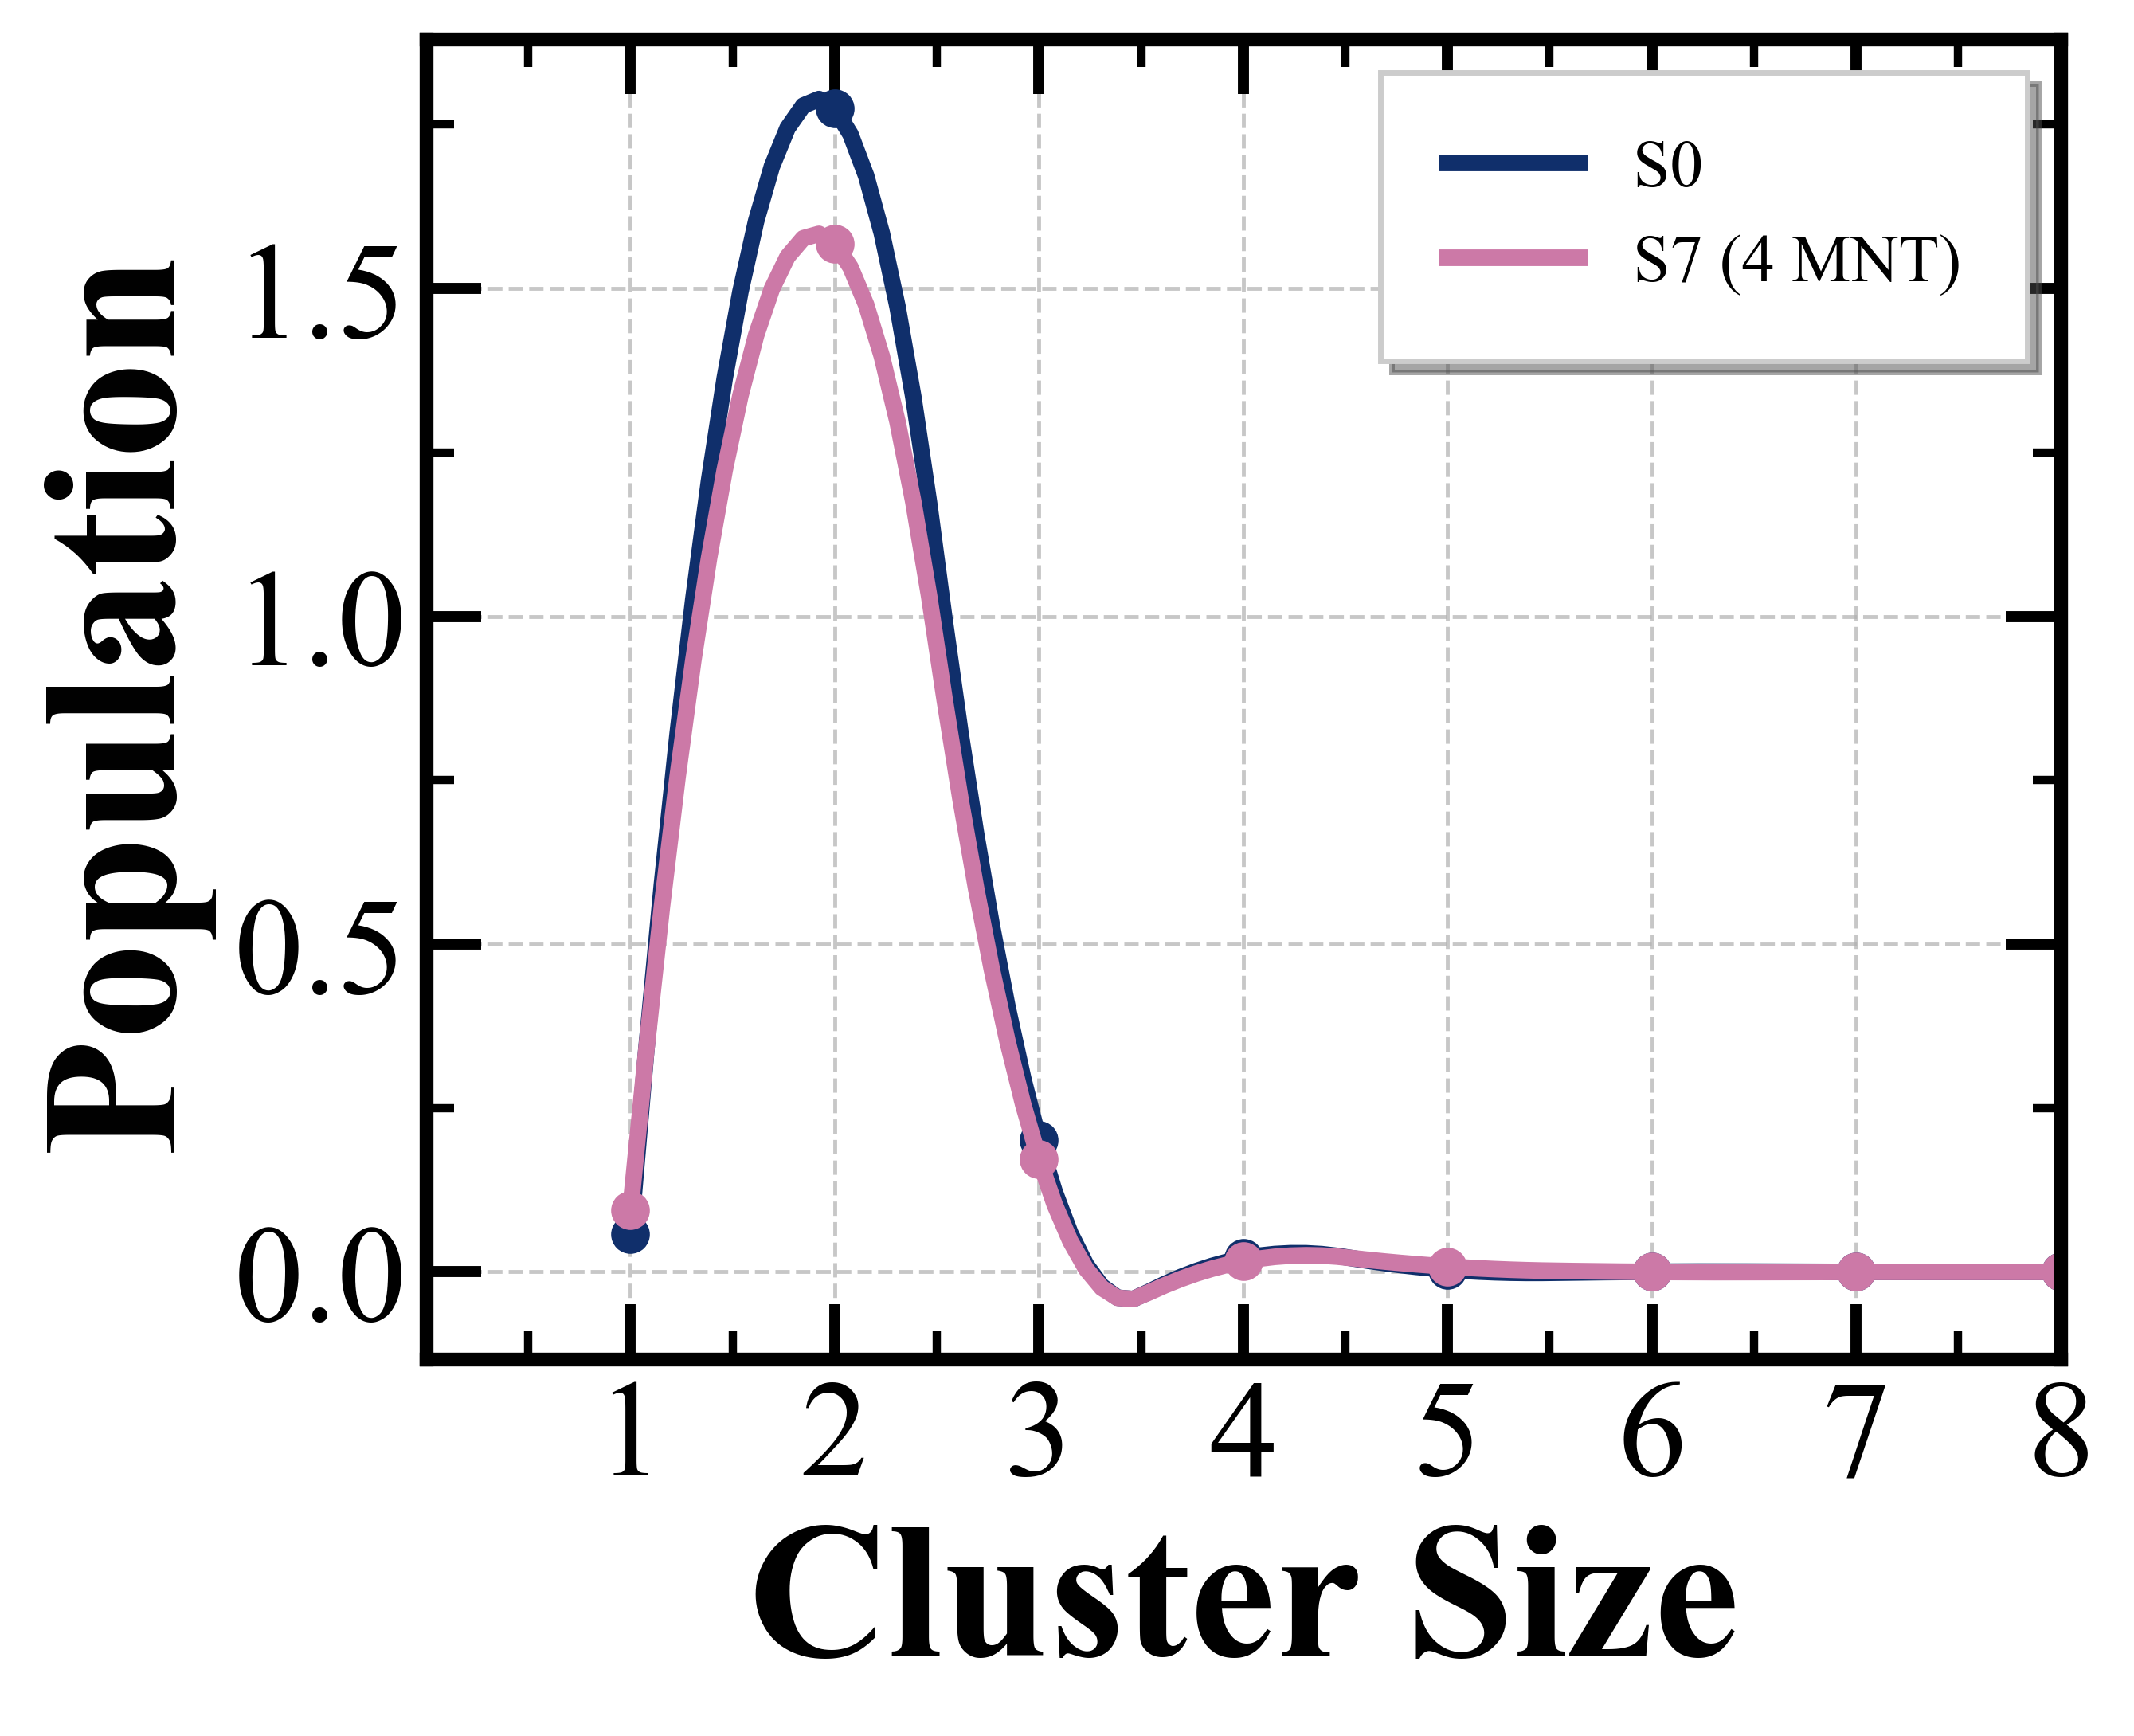

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_4mnt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_4mnt, 'o', color='#CC79A7', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#CC79A7', linewidth=3, label='S7 (4 MNT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S7.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


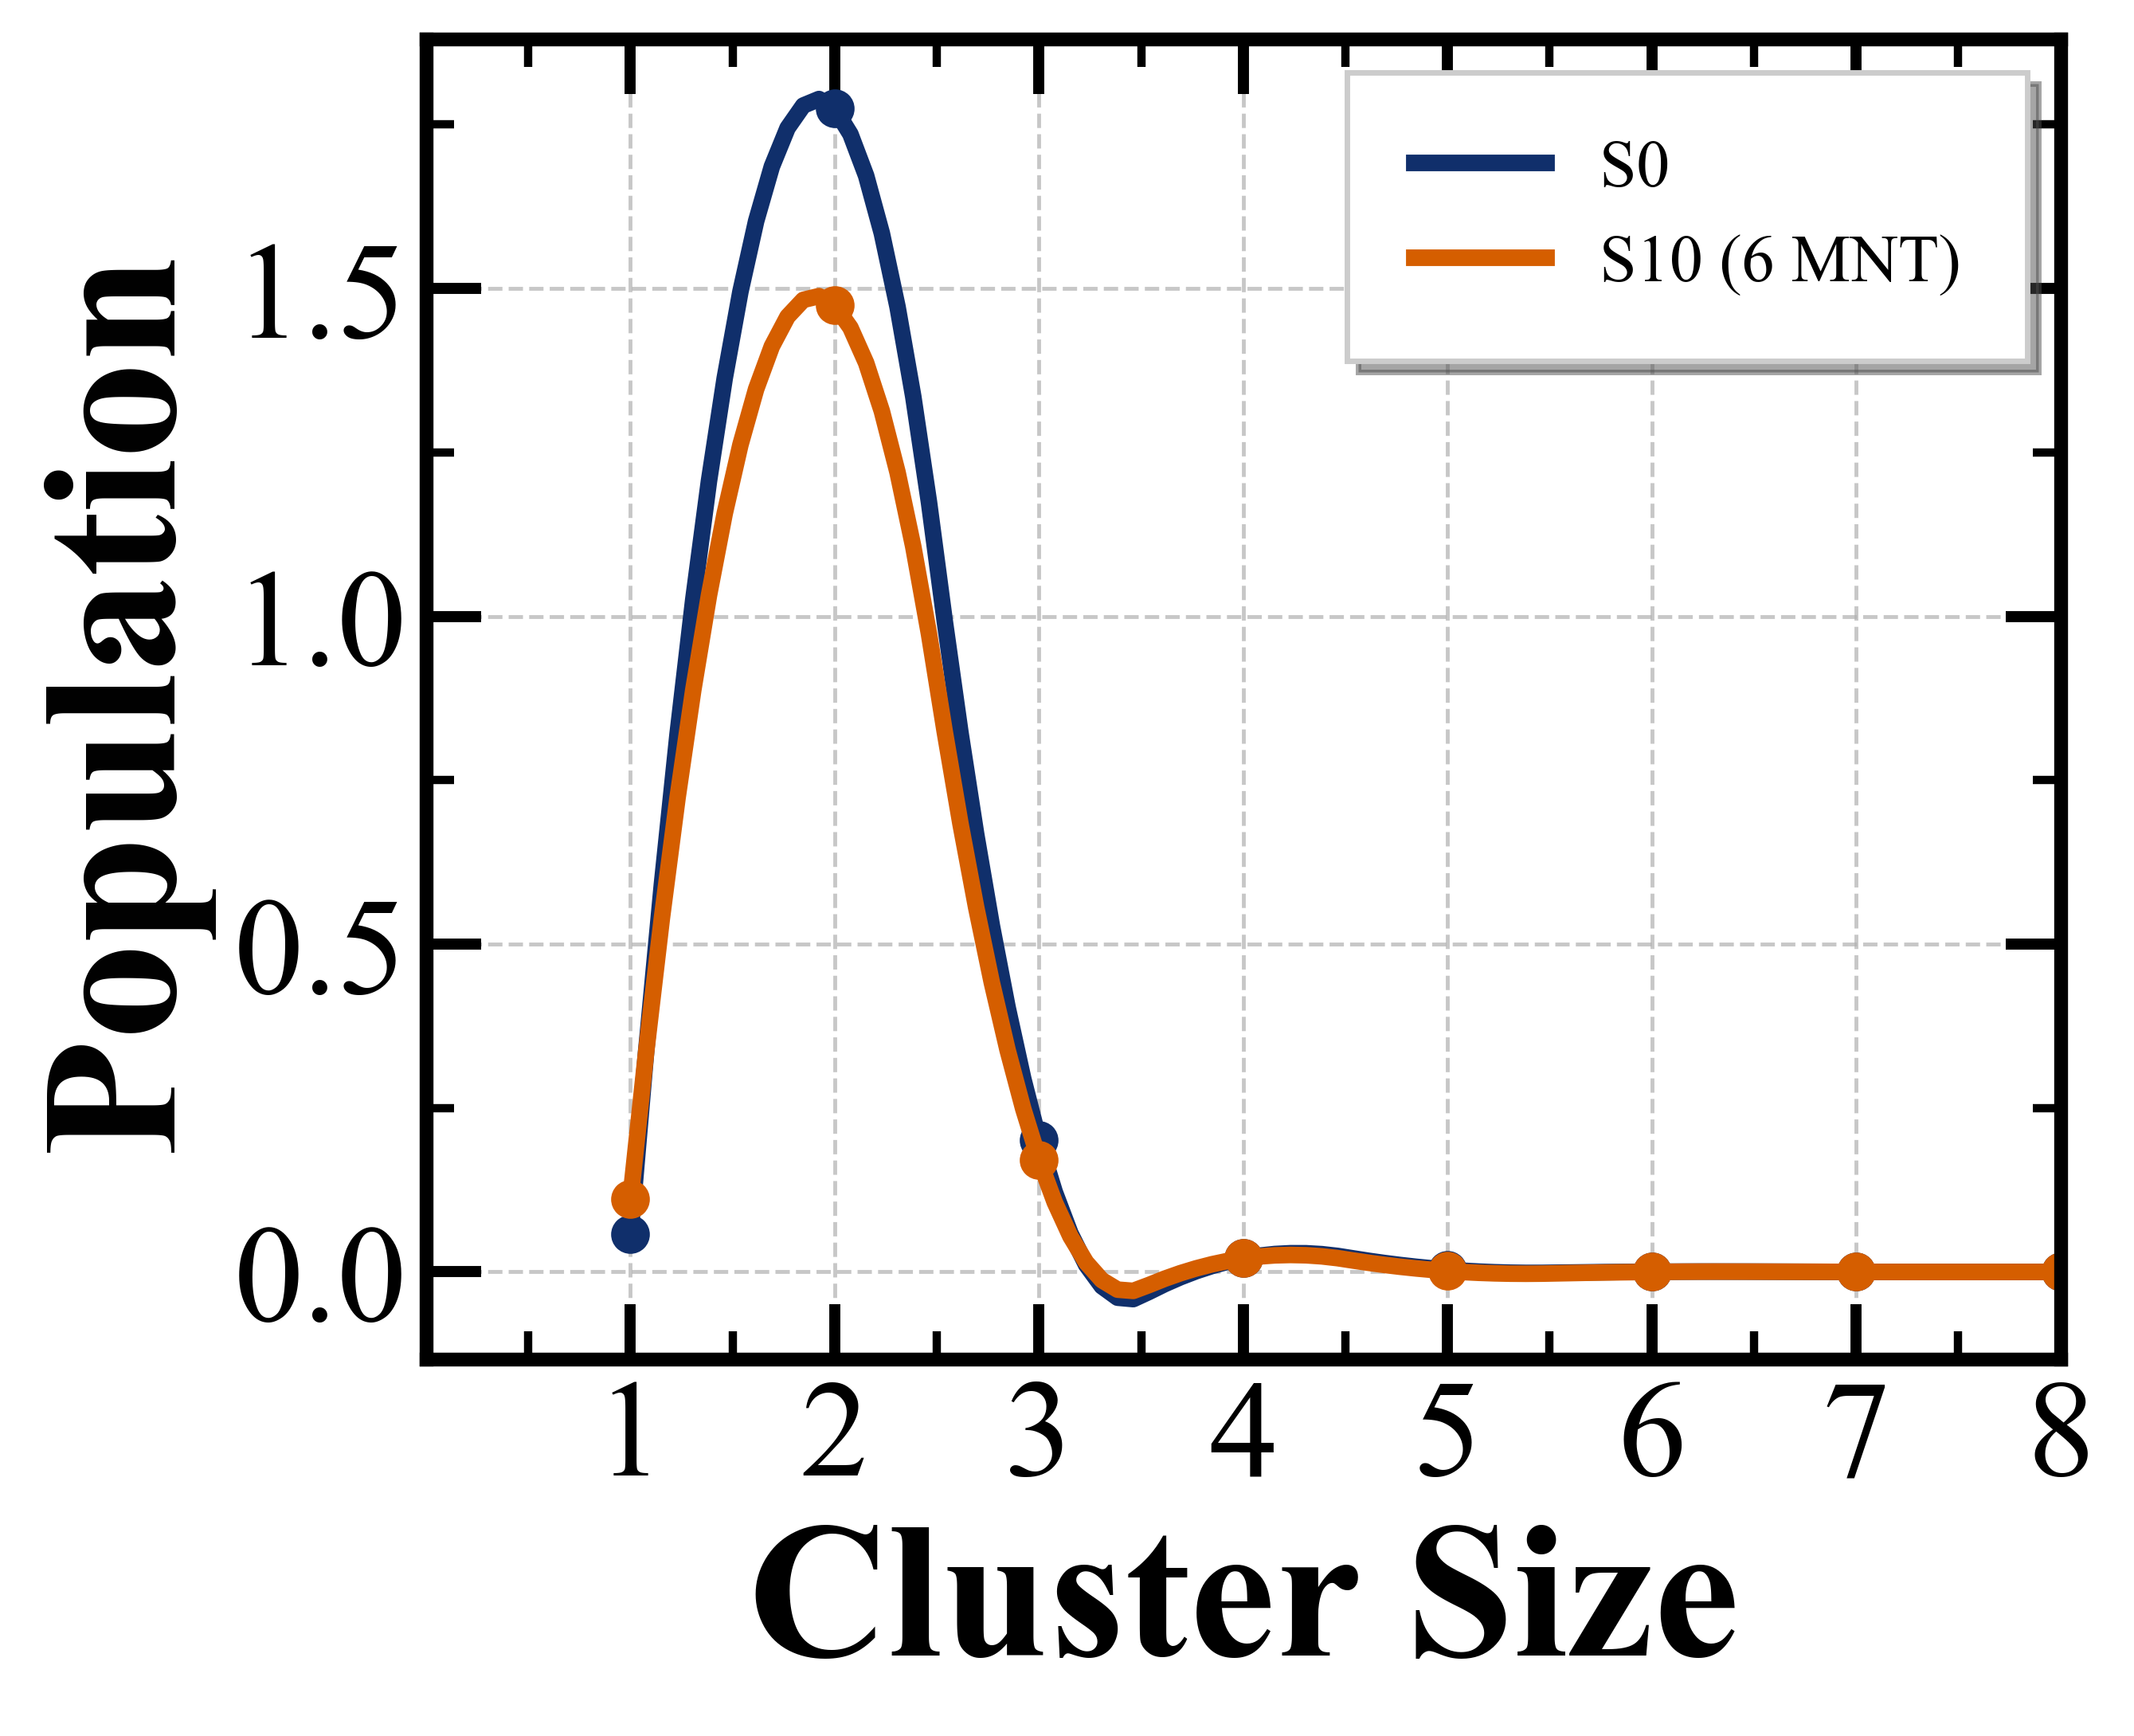

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_6mnt, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_6mnt, 'o', color='#D55E00', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#D55E00', linewidth=3, label='S10 (6 MNT)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S10.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


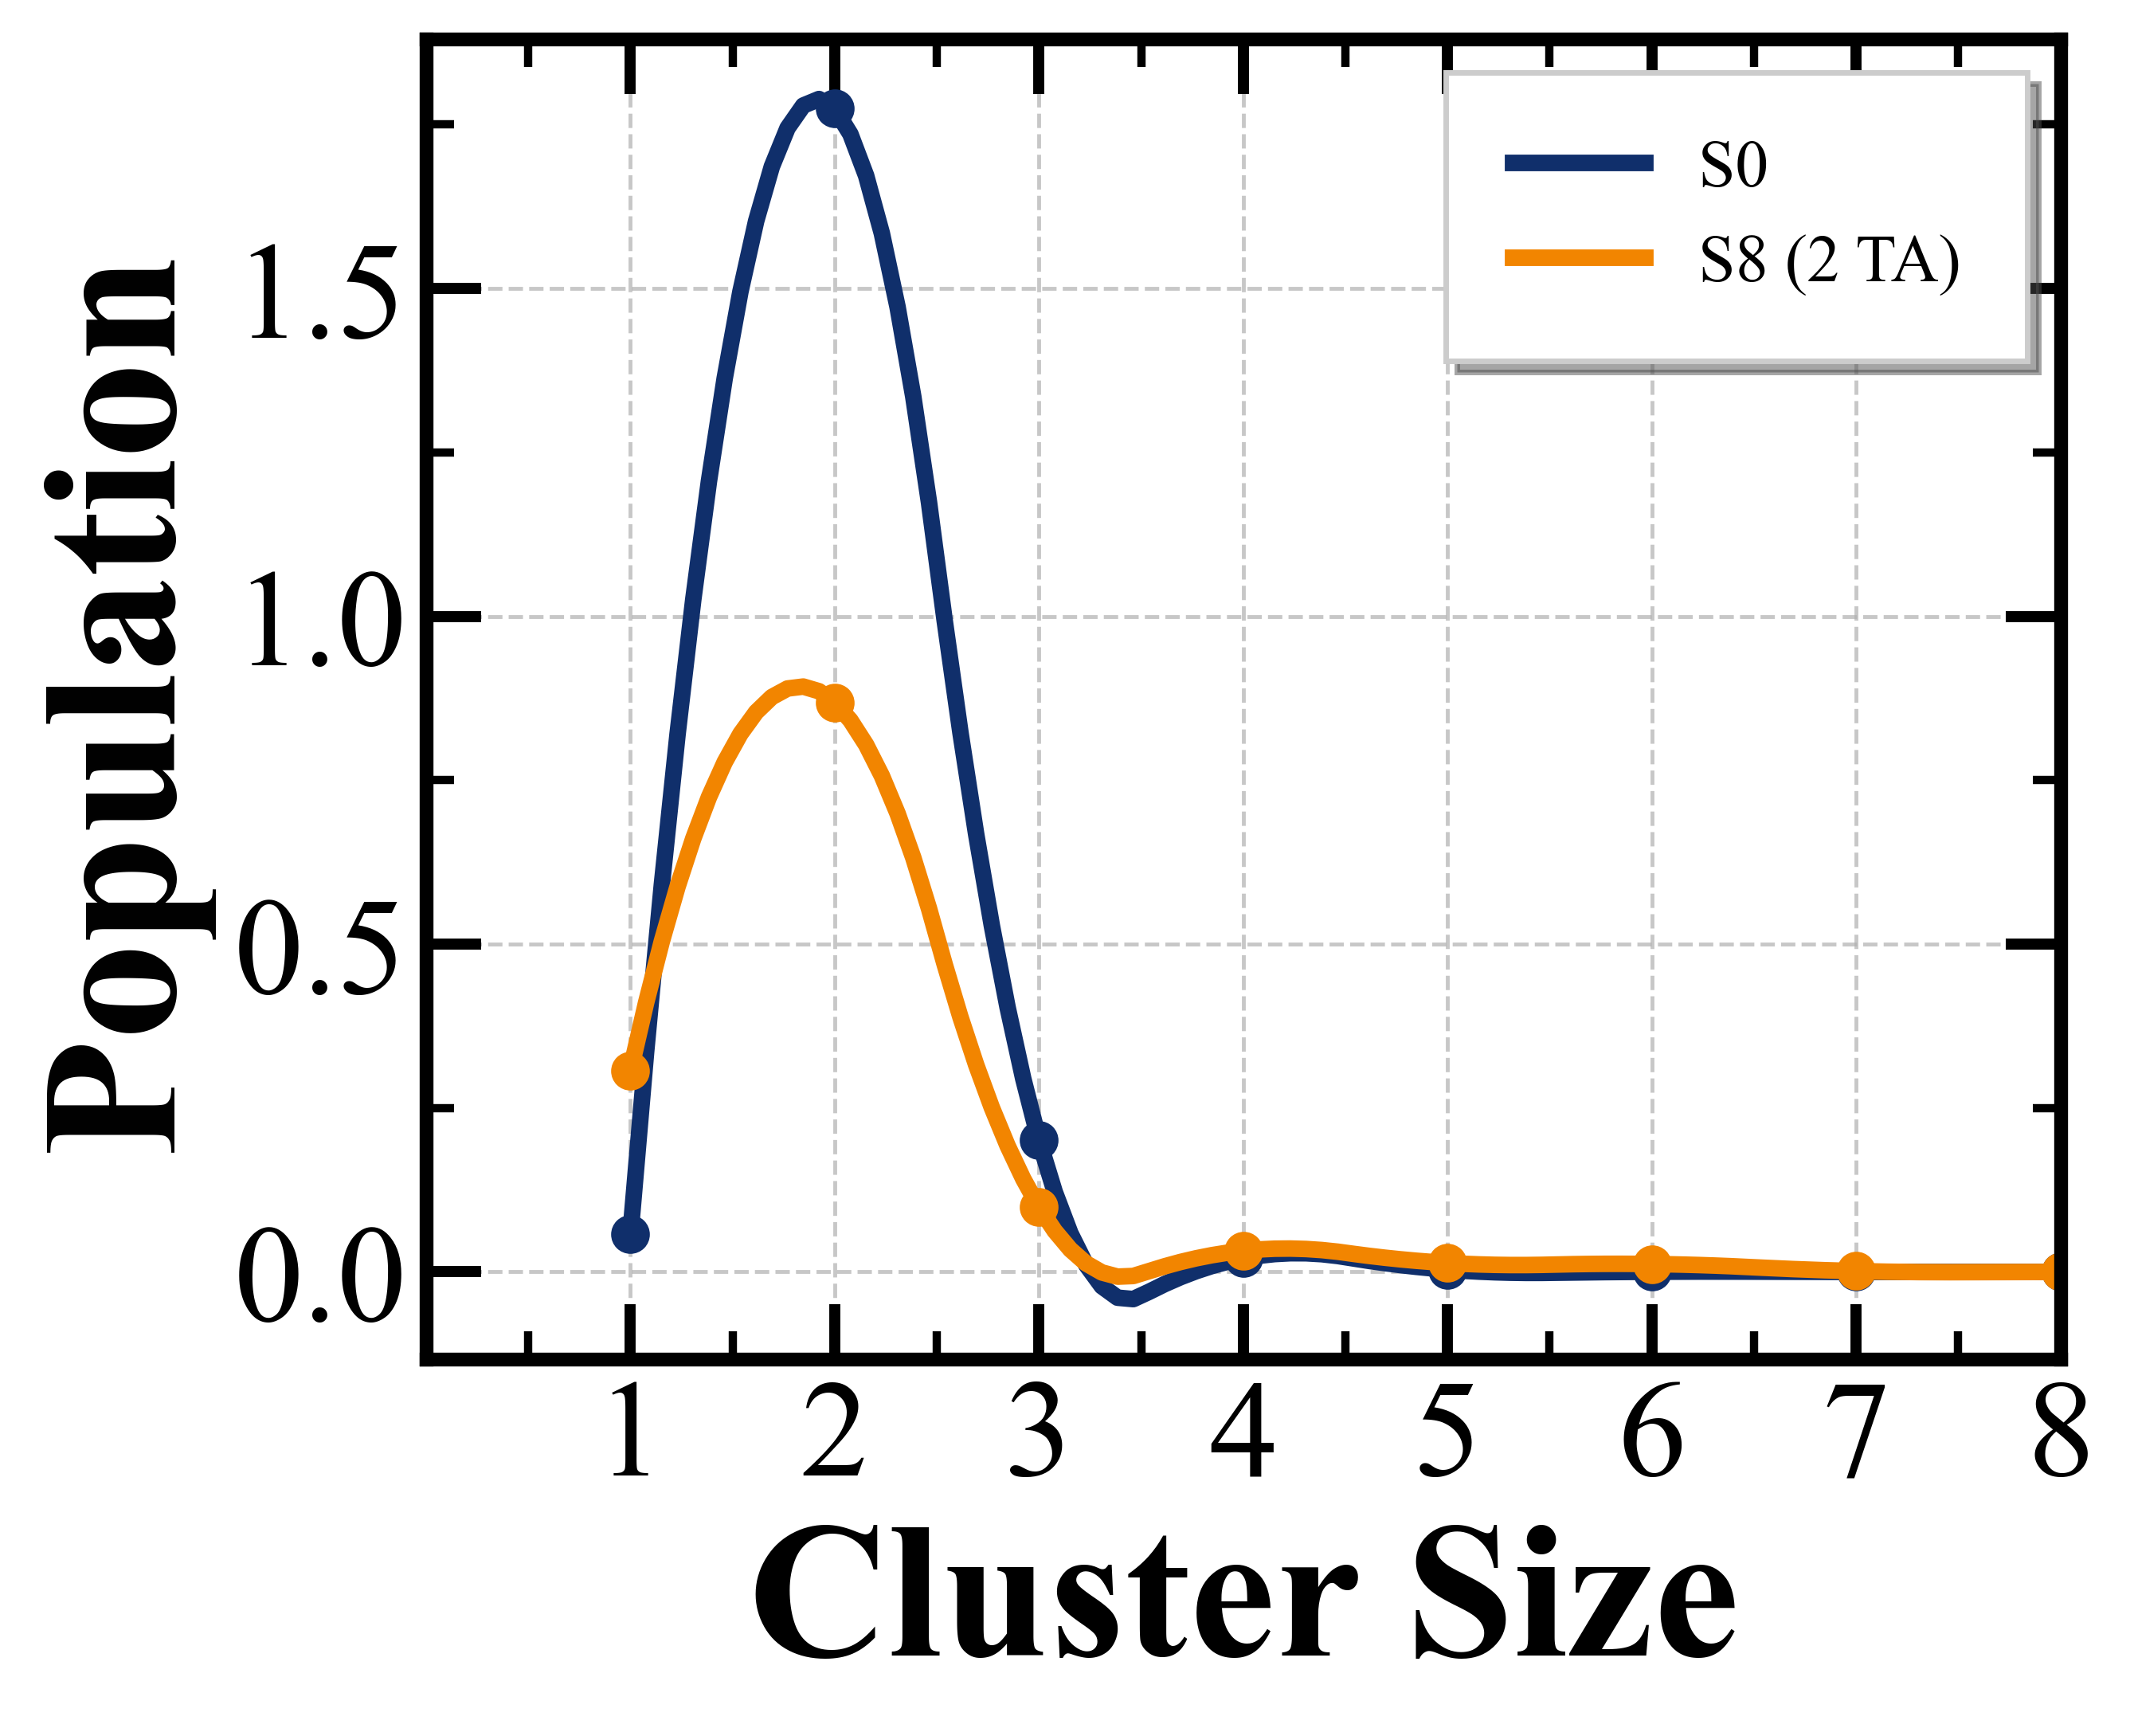

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_2ta, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_2ta, 'o', color='#F28500', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#F28500', linewidth=3, label='S8 (2 TA)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S8.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()


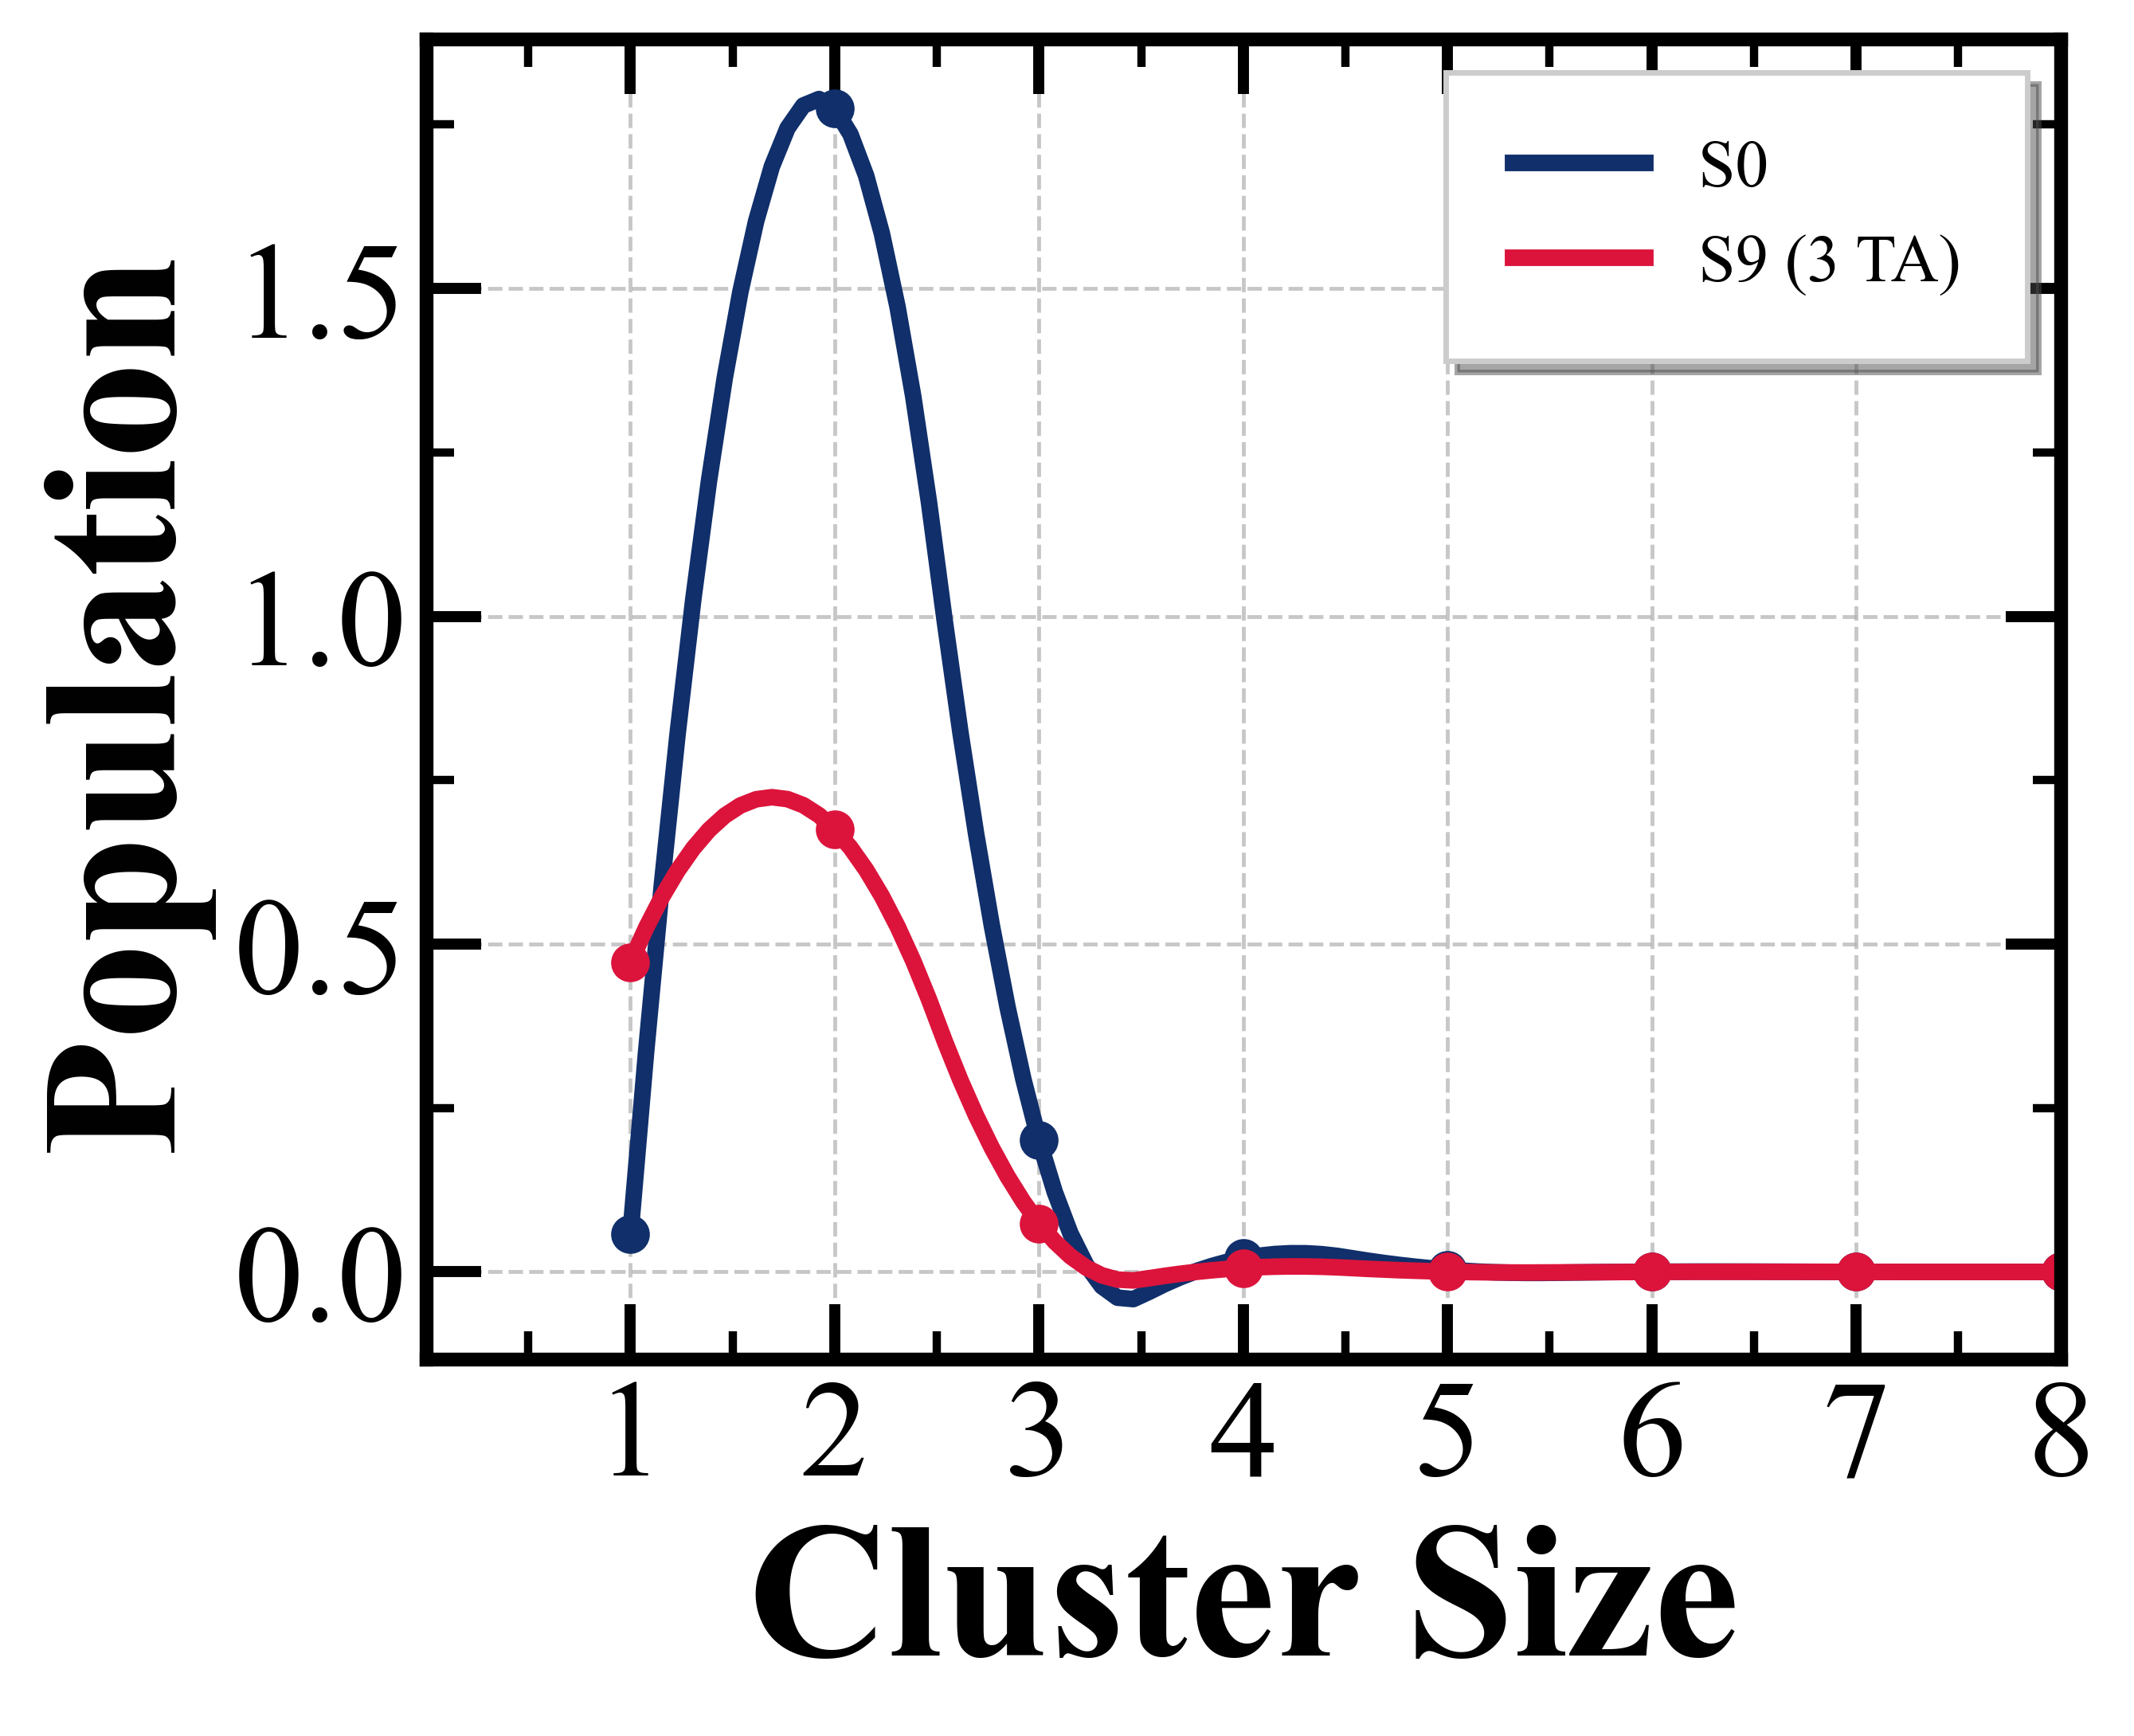

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from scipy.interpolate import make_interp_spline

# Set publication-quality plotting parameters
import matplotlib
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 28,
    "axes.labelsize": 35,
    "axes.titlesize": 20,
    "axes.labelweight": 'bold',
    "axes.linewidth": 2.5,
    "lines.linewidth": 3,
    "xtick.labelsize": 25,
    "ytick.labelsize": 25,
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 10,
    "ytick.major.size": 10,
    "xtick.major.width": 3,
    "ytick.major.width": 3,
    "xtick.minor.size": 5,
    "ytick.minor.size": 5,
    "xtick.minor.width": 3,
    "ytick.minor.width": 3,
    "xtick.minor.visible": True,
    "ytick.minor.visible": True,
    "legend.fontsize": 12,
    "legend.frameon": True,
    "legend.loc": 'upper right',
    "legend.markerscale": 1.5,
    "legend.borderpad": 1.0,
    "savefig.dpi": 500,
    "savefig.bbox": 'tight',
})

# Define bins
bins = np.linspace(1, 24, endpoint=True, num=24)
bins_new = np.linspace(bins.min(), bins.max(), 300)


# Smooth the data using cubic spline interpolation
spl = make_interp_spline(bins, average_clusters, k=2)  
spl1 = make_interp_spline(bins, average_clusters_3ta, k=2)  
smooth_values = spl(bins_new)
smooth_values1 = spl1(bins_new)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5), dpi=500)

# Scatter plot with smoothed lines
ax.plot(bins, average_clusters, 'o', color='#102F6B', markersize=6)
ax.plot(bins_new, smooth_values, '-', color='#102F6B', linewidth=3, label='S0 ')

ax.plot(bins, average_clusters_3ta, 'o', color='#DC143C', markersize=6)
ax.plot(bins_new, smooth_values1, '-', color='#DC143C', linewidth=3, label='S9 (3 TA)')

# Labels
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Population')

# Set specific ticks on X and Y axes
ax.set_xticks(np.arange(1, 9, 1))  
ax.set_yticks(np.arange(0, 2, 0.5))
# ax.set_yticks(np.arange(0, max(max(average_clusters), max(average_clusters_1ta)) + 10, 20))  # Y-axis ticks with step size 20

# Grid and minor ticks
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
ax.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Fine-tune tick visibility
ax.tick_params(axis='both', which='major', length=10, width=2)
ax.tick_params(axis='both', which='minor', length=5, width=1.5)

# Legend
ax.legend(ncol=1, frameon=True, fancybox=False, shadow=True, prop={'weight': 'normal'})

# Set x-axis limit
plt.xlim(0, 8)

# Adjust layout and save
plt.tight_layout()
plt.savefig('cluster_population_S0-S9.png', dpi=500, bbox_inches="tight")

# Show plot
plt.show()
